Reference：
Week-4-Regression.ipynb
Week-3-Basic-Statistics-Solutions


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the data
df_manic_phase = pd.read_csv("data/manic_phase_xyz_coordinates.csv")

df_Depression_phase = pd.read_csv("data/Depression_phase_all_xyz_coordinates.csv")
df_manic_phase
# df_Depression_phase

,TYPE,FILE,FRAME,ID,X,Y,Z,TS
0,emotion_dataset/manic_phase,angry/angry_1.mp4,1,0,0.671271,0.235480,-0.446483,1695319254920
1,emotion_dataset/manic_phase,angry/angry_1.mp4,1,1,0.691890,0.183197,-0.430631,1695319254920
2,emotion_dataset/manic_phase,angry/angry_1.mp4,1,2,0.703770,0.184858,-0.430783,1695319254920
3,emotion_dataset/manic_phase,angry/angry_1.mp4,1,3,0.713277,0.186520,-0.430710,1695319254920
4,emotion_dataset/manic_phase,angry/angry_1.mp4,1,4,0.655068,0.178206,-0.411369,1695319254920
...,...,...,...,...,...,...,...,...
1128370,emotion_dataset/manic_phase,happy/high_99.mp4,90,20,0.633505,0.657162,-0.788600,1695320610575
1128371,emotion_dataset/manic_phase,happy/high_99.mp4,90,21,0.737125,0.644565,-0.546489,1695320610575
1128372,emotion_dataset/manic_phase,happy/high_99.mp4,90,22,0.620213,0.643878,-0.722211,1695320610575
1128373,emotion_dataset/manic_phase,happy/high_99.mp4,90,23,0.615122,1.004662,0.075252,1695320610575


In [3]:
# Functions to calculate distances
def calculate_distance(row):
    if 'prev_row' in calculate_distance.__dict__:
        prev_row = calculate_distance.prev_row
        distance = np.sqrt((row['X'] - prev_row['X'])**2 +
                           (row['Y'] - prev_row['Y'])**2 +
                           (row['Z'] - prev_row['Z'])**2) * (10 ** 3)
    else:
        distance = np.nan  # The first row has no previous row, and the distance is NaN
    calculate_distance.prev_row = {'X': row['X'], 'Y': row['X'], 'Z': row['Z']}
    return distance

In [4]:
# Calculate the function of speed
def calculate_speed(row):
    if 'prev_row' in calculate_speed.__dict__:
        prev_row = calculate_speed.prev_row
        distance_diff = row['DIST']
        time_diff = row['TS'] - prev_row['TS']
        if time_diff > 0:
            speed = distance_diff / time_diff
        else:
            speed = np.nan  # Avoid division by zero errors
    else:
        speed = np.nan  # The first line has no previous line and the speed is NaN #
    calculate_speed.prev_row = {'DIST': row['DIST'], 'TS': row['TS']}
    return speed

In [5]:
# Use loops to calculate the speed of motion for each bone point in each video
# Sort by time
def calculate_phase_speed(df_phase):
    unique_files = df_phase['FILE'].unique()
    # print(unique_files)
    landmarks_data = []
    for file in unique_files:
        unique_id = df_phase['ID'].unique()
        for id in unique_id:
            if 'prev_row' in calculate_distance.__dict__:
                del calculate_distance.__dict__['prev_row']
            if 'prev_row' in calculate_speed.__dict__:
                del calculate_speed.__dict__['prev_row']
            df = df_phase.loc[(df_phase['FILE'] == file) & (df_phase['ID'] == id)]
#             print(file, id)
            if df.empty:
                continue
            df = df.sort_values(by='FRAME').reset_index()
            df['DIST'] = df.apply(calculate_distance, axis=1)
            df['SPEED'] = df.apply(calculate_speed, axis=1)
            # Filter out rows where 'SPEED' is listed as NaN
            df = df.dropna(subset=['SPEED'])
            # Find the maximum and minimum values of the "SPEED" column.
            max_speed = df['SPEED'].max()
            min_speed = df['SPEED'].min()
            # Remove rows with maximum and minimum values
            filtered_df = df[(df['SPEED'] != max_speed) & (df['SPEED'] != min_speed)]
            # Calculate the average after removing the maximum and minimum values
            average_speed = filtered_df['SPEED'].mean()
            landmarks_data.append({"TYPE":df.iloc[0]['TYPE'], "FILE":df.iloc[0]['FILE'], "ID":df.iloc[0]['ID'], "SPEED":average_speed})

    df_landmarks = pd.DataFrame(landmarks_data)
    return df_landmarks

In [6]:
df_manic_speed = calculate_phase_speed(df_manic_phase)
df_manic_speed

angry/angry_1.mp4 0
angry/angry_1.mp4 1
angry/angry_1.mp4 2
angry/angry_1.mp4 3
angry/angry_1.mp4 4
angry/angry_1.mp4 5
angry/angry_1.mp4 6
angry/angry_1.mp4 7
angry/angry_1.mp4 8
angry/angry_1.mp4 9
angry/angry_1.mp4 10
angry/angry_1.mp4 11
angry/angry_1.mp4 12
angry/angry_1.mp4 13
angry/angry_1.mp4 14
angry/angry_1.mp4 15
angry/angry_1.mp4 16
angry/angry_1.mp4 17
angry/angry_1.mp4 18
angry/angry_1.mp4 19
angry/angry_1.mp4 20
angry/angry_1.mp4 21
angry/angry_1.mp4 22
angry/angry_1.mp4 23
angry/angry_1.mp4 24
angry/angry_10.mp4 0
angry/angry_10.mp4 1
angry/angry_10.mp4 2
angry/angry_10.mp4 3
angry/angry_10.mp4 4
angry/angry_10.mp4 5
angry/angry_10.mp4 6
angry/angry_10.mp4 7
angry/angry_10.mp4 8
angry/angry_10.mp4 9
angry/angry_10.mp4 10
angry/angry_10.mp4 11
angry/angry_10.mp4 12
angry/angry_10.mp4 13
angry/angry_10.mp4 14
angry/angry_10.mp4 15
angry/angry_10.mp4 16
angry/angry_10.mp4 17
angry/angry_10.mp4 18
angry/angry_10.mp4 19
angry/angry_10.mp4 20
angry/angry_10.mp4 21
angry/angry

angry/angry_111.mp4 22
angry/angry_111.mp4 23
angry/angry_111.mp4 24
angry/angry_112.mp4 0
angry/angry_112.mp4 1
angry/angry_112.mp4 2
angry/angry_112.mp4 3
angry/angry_112.mp4 4
angry/angry_112.mp4 5
angry/angry_112.mp4 6
angry/angry_112.mp4 7
angry/angry_112.mp4 8
angry/angry_112.mp4 9
angry/angry_112.mp4 10
angry/angry_112.mp4 11
angry/angry_112.mp4 12
angry/angry_112.mp4 13
angry/angry_112.mp4 14
angry/angry_112.mp4 15
angry/angry_112.mp4 16
angry/angry_112.mp4 17
angry/angry_112.mp4 18
angry/angry_112.mp4 19
angry/angry_112.mp4 20
angry/angry_112.mp4 21
angry/angry_112.mp4 22
angry/angry_112.mp4 23
angry/angry_112.mp4 24
angry/angry_113.mp4 0
angry/angry_113.mp4 1
angry/angry_113.mp4 2
angry/angry_113.mp4 3
angry/angry_113.mp4 4
angry/angry_113.mp4 5
angry/angry_113.mp4 6
angry/angry_113.mp4 7
angry/angry_113.mp4 8
angry/angry_113.mp4 9
angry/angry_113.mp4 10
angry/angry_113.mp4 11
angry/angry_113.mp4 12
angry/angry_113.mp4 13
angry/angry_113.mp4 14
angry/angry_113.mp4 15
angry/an

angry/angry_125.mp4 16
angry/angry_125.mp4 17
angry/angry_125.mp4 18
angry/angry_125.mp4 19
angry/angry_125.mp4 20
angry/angry_125.mp4 21
angry/angry_125.mp4 22
angry/angry_125.mp4 23
angry/angry_125.mp4 24
angry/angry_126.mp4 0
angry/angry_126.mp4 1
angry/angry_126.mp4 2
angry/angry_126.mp4 3
angry/angry_126.mp4 4
angry/angry_126.mp4 5
angry/angry_126.mp4 6
angry/angry_126.mp4 7
angry/angry_126.mp4 8
angry/angry_126.mp4 9
angry/angry_126.mp4 10
angry/angry_126.mp4 11
angry/angry_126.mp4 12
angry/angry_126.mp4 13
angry/angry_126.mp4 14
angry/angry_126.mp4 15
angry/angry_126.mp4 16
angry/angry_126.mp4 17
angry/angry_126.mp4 18
angry/angry_126.mp4 19
angry/angry_126.mp4 20
angry/angry_126.mp4 21
angry/angry_126.mp4 22
angry/angry_126.mp4 23
angry/angry_126.mp4 24
angry/angry_127.mp4 0
angry/angry_127.mp4 1
angry/angry_127.mp4 2
angry/angry_127.mp4 3
angry/angry_127.mp4 4
angry/angry_127.mp4 5
angry/angry_127.mp4 6
angry/angry_127.mp4 7
angry/angry_127.mp4 8
angry/angry_127.mp4 9
angry/an

angry/angry_139.mp4 5
angry/angry_139.mp4 6
angry/angry_139.mp4 7
angry/angry_139.mp4 8
angry/angry_139.mp4 9
angry/angry_139.mp4 10
angry/angry_139.mp4 11
angry/angry_139.mp4 12
angry/angry_139.mp4 13
angry/angry_139.mp4 14
angry/angry_139.mp4 15
angry/angry_139.mp4 16
angry/angry_139.mp4 17
angry/angry_139.mp4 18
angry/angry_139.mp4 19
angry/angry_139.mp4 20
angry/angry_139.mp4 21
angry/angry_139.mp4 22
angry/angry_139.mp4 23
angry/angry_139.mp4 24
angry/angry_14.mp4 0
angry/angry_14.mp4 1
angry/angry_14.mp4 2
angry/angry_14.mp4 3
angry/angry_14.mp4 4
angry/angry_14.mp4 5
angry/angry_14.mp4 6
angry/angry_14.mp4 7
angry/angry_14.mp4 8
angry/angry_14.mp4 9
angry/angry_14.mp4 10
angry/angry_14.mp4 11
angry/angry_14.mp4 12
angry/angry_14.mp4 13
angry/angry_14.mp4 14
angry/angry_14.mp4 15
angry/angry_14.mp4 16
angry/angry_14.mp4 17
angry/angry_14.mp4 18
angry/angry_14.mp4 19
angry/angry_14.mp4 20
angry/angry_14.mp4 21
angry/angry_14.mp4 22
angry/angry_14.mp4 23
angry/angry_14.mp4 24
angry

angry/angry_151.mp4 23
angry/angry_151.mp4 24
angry/angry_152.mp4 0
angry/angry_152.mp4 1
angry/angry_152.mp4 2
angry/angry_152.mp4 3
angry/angry_152.mp4 4
angry/angry_152.mp4 5
angry/angry_152.mp4 6
angry/angry_152.mp4 7
angry/angry_152.mp4 8
angry/angry_152.mp4 9
angry/angry_152.mp4 10
angry/angry_152.mp4 11
angry/angry_152.mp4 12
angry/angry_152.mp4 13
angry/angry_152.mp4 14
angry/angry_152.mp4 15
angry/angry_152.mp4 16
angry/angry_152.mp4 17
angry/angry_152.mp4 18
angry/angry_152.mp4 19
angry/angry_152.mp4 20
angry/angry_152.mp4 21
angry/angry_152.mp4 22
angry/angry_152.mp4 23
angry/angry_152.mp4 24
angry/angry_153.mp4 0
angry/angry_153.mp4 1
angry/angry_153.mp4 2
angry/angry_153.mp4 3
angry/angry_153.mp4 4
angry/angry_153.mp4 5
angry/angry_153.mp4 6
angry/angry_153.mp4 7
angry/angry_153.mp4 8
angry/angry_153.mp4 9
angry/angry_153.mp4 10
angry/angry_153.mp4 11
angry/angry_153.mp4 12
angry/angry_153.mp4 13
angry/angry_153.mp4 14
angry/angry_153.mp4 15
angry/angry_153.mp4 16
angry/an

angry/angry_165.mp4 17
angry/angry_165.mp4 18
angry/angry_165.mp4 19
angry/angry_165.mp4 20
angry/angry_165.mp4 21
angry/angry_165.mp4 22
angry/angry_165.mp4 23
angry/angry_165.mp4 24
angry/angry_166.mp4 0
angry/angry_166.mp4 1
angry/angry_166.mp4 2
angry/angry_166.mp4 3
angry/angry_166.mp4 4
angry/angry_166.mp4 5
angry/angry_166.mp4 6
angry/angry_166.mp4 7
angry/angry_166.mp4 8
angry/angry_166.mp4 9
angry/angry_166.mp4 10
angry/angry_166.mp4 11
angry/angry_166.mp4 12
angry/angry_166.mp4 13
angry/angry_166.mp4 14
angry/angry_166.mp4 15
angry/angry_166.mp4 16
angry/angry_166.mp4 17
angry/angry_166.mp4 18
angry/angry_166.mp4 19
angry/angry_166.mp4 20
angry/angry_166.mp4 21
angry/angry_166.mp4 22
angry/angry_166.mp4 23
angry/angry_166.mp4 24
angry/angry_167.mp4 0
angry/angry_167.mp4 1
angry/angry_167.mp4 2
angry/angry_167.mp4 3
angry/angry_167.mp4 4
angry/angry_167.mp4 5
angry/angry_167.mp4 6
angry/angry_167.mp4 7
angry/angry_167.mp4 8
angry/angry_167.mp4 9
angry/angry_167.mp4 10
angry/an

angry/angry_18.mp4 6
angry/angry_18.mp4 7
angry/angry_18.mp4 8
angry/angry_18.mp4 9
angry/angry_18.mp4 10
angry/angry_18.mp4 11
angry/angry_18.mp4 12
angry/angry_18.mp4 13
angry/angry_18.mp4 14
angry/angry_18.mp4 15
angry/angry_18.mp4 16
angry/angry_18.mp4 17
angry/angry_18.mp4 18
angry/angry_18.mp4 19
angry/angry_18.mp4 20
angry/angry_18.mp4 21
angry/angry_18.mp4 22
angry/angry_18.mp4 23
angry/angry_18.mp4 24
angry/angry_180.mp4 0
angry/angry_180.mp4 1
angry/angry_180.mp4 2
angry/angry_180.mp4 3
angry/angry_180.mp4 4
angry/angry_180.mp4 5
angry/angry_180.mp4 6
angry/angry_180.mp4 7
angry/angry_180.mp4 8
angry/angry_180.mp4 9
angry/angry_180.mp4 10
angry/angry_180.mp4 11
angry/angry_180.mp4 12
angry/angry_180.mp4 13
angry/angry_180.mp4 14
angry/angry_180.mp4 15
angry/angry_180.mp4 16
angry/angry_180.mp4 17
angry/angry_180.mp4 18
angry/angry_180.mp4 19
angry/angry_180.mp4 20
angry/angry_180.mp4 21
angry/angry_180.mp4 22
angry/angry_180.mp4 23
angry/angry_180.mp4 24
angry/angry_181.mp4 0

angry/angry_192.mp4 21
angry/angry_192.mp4 22
angry/angry_192.mp4 23
angry/angry_192.mp4 24
angry/angry_193.mp4 0
angry/angry_193.mp4 1
angry/angry_193.mp4 2
angry/angry_193.mp4 3
angry/angry_193.mp4 4
angry/angry_193.mp4 5
angry/angry_193.mp4 6
angry/angry_193.mp4 7
angry/angry_193.mp4 8
angry/angry_193.mp4 9
angry/angry_193.mp4 10
angry/angry_193.mp4 11
angry/angry_193.mp4 12
angry/angry_193.mp4 13
angry/angry_193.mp4 14
angry/angry_193.mp4 15
angry/angry_193.mp4 16
angry/angry_193.mp4 17
angry/angry_193.mp4 18
angry/angry_193.mp4 19
angry/angry_193.mp4 20
angry/angry_193.mp4 21
angry/angry_193.mp4 22
angry/angry_193.mp4 23
angry/angry_193.mp4 24
angry/angry_194.mp4 0
angry/angry_194.mp4 1
angry/angry_194.mp4 2
angry/angry_194.mp4 3
angry/angry_194.mp4 4
angry/angry_194.mp4 5
angry/angry_194.mp4 6
angry/angry_194.mp4 7
angry/angry_194.mp4 8
angry/angry_194.mp4 9
angry/angry_194.mp4 10
angry/angry_194.mp4 11
angry/angry_194.mp4 12
angry/angry_194.mp4 13
angry/angry_194.mp4 14
angry/an

angry/angry_24.mp4 16
angry/angry_24.mp4 17
angry/angry_24.mp4 18
angry/angry_24.mp4 19
angry/angry_24.mp4 20
angry/angry_24.mp4 21
angry/angry_24.mp4 22
angry/angry_24.mp4 23
angry/angry_24.mp4 24
angry/angry_25.mp4 0
angry/angry_25.mp4 1
angry/angry_25.mp4 2
angry/angry_25.mp4 3
angry/angry_25.mp4 4
angry/angry_25.mp4 5
angry/angry_25.mp4 6
angry/angry_25.mp4 7
angry/angry_25.mp4 8
angry/angry_25.mp4 9
angry/angry_25.mp4 10
angry/angry_25.mp4 11
angry/angry_25.mp4 12
angry/angry_25.mp4 13
angry/angry_25.mp4 14
angry/angry_25.mp4 15
angry/angry_25.mp4 16
angry/angry_25.mp4 17
angry/angry_25.mp4 18
angry/angry_25.mp4 19
angry/angry_25.mp4 20
angry/angry_25.mp4 21
angry/angry_25.mp4 22
angry/angry_25.mp4 23
angry/angry_25.mp4 24
angry/angry_26.mp4 0
angry/angry_26.mp4 1
angry/angry_26.mp4 2
angry/angry_26.mp4 3
angry/angry_26.mp4 4
angry/angry_26.mp4 5
angry/angry_26.mp4 6
angry/angry_26.mp4 7
angry/angry_26.mp4 8
angry/angry_26.mp4 9
angry/angry_26.mp4 10
angry/angry_26.mp4 11
angry/an

angry/angry_39.mp4 1
angry/angry_39.mp4 2
angry/angry_39.mp4 3
angry/angry_39.mp4 4
angry/angry_39.mp4 5
angry/angry_39.mp4 6
angry/angry_39.mp4 7
angry/angry_39.mp4 8
angry/angry_39.mp4 9
angry/angry_39.mp4 10
angry/angry_39.mp4 11
angry/angry_39.mp4 12
angry/angry_39.mp4 13
angry/angry_39.mp4 14
angry/angry_39.mp4 15
angry/angry_39.mp4 16
angry/angry_39.mp4 17
angry/angry_39.mp4 18
angry/angry_39.mp4 19
angry/angry_39.mp4 20
angry/angry_39.mp4 21
angry/angry_39.mp4 22
angry/angry_39.mp4 23
angry/angry_39.mp4 24
angry/angry_4.mp4 0
angry/angry_4.mp4 1
angry/angry_4.mp4 2
angry/angry_4.mp4 3
angry/angry_4.mp4 4
angry/angry_4.mp4 5
angry/angry_4.mp4 6
angry/angry_4.mp4 7
angry/angry_4.mp4 8
angry/angry_4.mp4 9
angry/angry_4.mp4 10
angry/angry_4.mp4 11
angry/angry_4.mp4 12
angry/angry_4.mp4 13
angry/angry_4.mp4 14
angry/angry_4.mp4 15
angry/angry_4.mp4 16
angry/angry_4.mp4 17
angry/angry_4.mp4 18
angry/angry_4.mp4 19
angry/angry_4.mp4 20
angry/angry_4.mp4 21
angry/angry_4.mp4 22
angry/an

angry/angry_52.mp4 8
angry/angry_52.mp4 9
angry/angry_52.mp4 10
angry/angry_52.mp4 11
angry/angry_52.mp4 12
angry/angry_52.mp4 13
angry/angry_52.mp4 14
angry/angry_52.mp4 15
angry/angry_52.mp4 16
angry/angry_52.mp4 17
angry/angry_52.mp4 18
angry/angry_52.mp4 19
angry/angry_52.mp4 20
angry/angry_52.mp4 21
angry/angry_52.mp4 22
angry/angry_52.mp4 23
angry/angry_52.mp4 24
angry/angry_53.mp4 0
angry/angry_53.mp4 1
angry/angry_53.mp4 2
angry/angry_53.mp4 3
angry/angry_53.mp4 4
angry/angry_53.mp4 5
angry/angry_53.mp4 6
angry/angry_53.mp4 7
angry/angry_53.mp4 8
angry/angry_53.mp4 9
angry/angry_53.mp4 10
angry/angry_53.mp4 11
angry/angry_53.mp4 12
angry/angry_53.mp4 13
angry/angry_53.mp4 14
angry/angry_53.mp4 15
angry/angry_53.mp4 16
angry/angry_53.mp4 17
angry/angry_53.mp4 18
angry/angry_53.mp4 19
angry/angry_53.mp4 20
angry/angry_53.mp4 21
angry/angry_53.mp4 22
angry/angry_53.mp4 23
angry/angry_53.mp4 24
angry/angry_54.mp4 0
angry/angry_54.mp4 1
angry/angry_54.mp4 2
angry/angry_54.mp4 3
angr

angry/angry_66.mp4 17
angry/angry_66.mp4 18
angry/angry_66.mp4 19
angry/angry_66.mp4 20
angry/angry_66.mp4 21
angry/angry_66.mp4 22
angry/angry_66.mp4 23
angry/angry_66.mp4 24
angry/angry_67.mp4 0
angry/angry_67.mp4 1
angry/angry_67.mp4 2
angry/angry_67.mp4 3
angry/angry_67.mp4 4
angry/angry_67.mp4 5
angry/angry_67.mp4 6
angry/angry_67.mp4 7
angry/angry_67.mp4 8
angry/angry_67.mp4 9
angry/angry_67.mp4 10
angry/angry_67.mp4 11
angry/angry_67.mp4 12
angry/angry_67.mp4 13
angry/angry_67.mp4 14
angry/angry_67.mp4 15
angry/angry_67.mp4 16
angry/angry_67.mp4 17
angry/angry_67.mp4 18
angry/angry_67.mp4 19
angry/angry_67.mp4 20
angry/angry_67.mp4 21
angry/angry_67.mp4 22
angry/angry_67.mp4 23
angry/angry_67.mp4 24
angry/angry_68.mp4 0
angry/angry_68.mp4 1
angry/angry_68.mp4 2
angry/angry_68.mp4 3
angry/angry_68.mp4 4
angry/angry_68.mp4 5
angry/angry_68.mp4 6
angry/angry_68.mp4 7
angry/angry_68.mp4 8
angry/angry_68.mp4 9
angry/angry_68.mp4 10
angry/angry_68.mp4 11
angry/angry_68.mp4 12
angry/an

angry/angry_81.mp4 24
angry/angry_82.mp4 0
angry/angry_82.mp4 1
angry/angry_82.mp4 2
angry/angry_82.mp4 3
angry/angry_82.mp4 4
angry/angry_82.mp4 5
angry/angry_82.mp4 6
angry/angry_82.mp4 7
angry/angry_82.mp4 8
angry/angry_82.mp4 9
angry/angry_82.mp4 10
angry/angry_82.mp4 11
angry/angry_82.mp4 12
angry/angry_82.mp4 13
angry/angry_82.mp4 14
angry/angry_82.mp4 15
angry/angry_82.mp4 16
angry/angry_82.mp4 17
angry/angry_82.mp4 18
angry/angry_82.mp4 19
angry/angry_82.mp4 20
angry/angry_82.mp4 21
angry/angry_82.mp4 22
angry/angry_82.mp4 23
angry/angry_82.mp4 24
angry/angry_83.mp4 0
angry/angry_83.mp4 1
angry/angry_83.mp4 2
angry/angry_83.mp4 3
angry/angry_83.mp4 4
angry/angry_83.mp4 5
angry/angry_83.mp4 6
angry/angry_83.mp4 7
angry/angry_83.mp4 8
angry/angry_83.mp4 9
angry/angry_83.mp4 10
angry/angry_83.mp4 11
angry/angry_83.mp4 12
angry/angry_83.mp4 13
angry/angry_83.mp4 14
angry/angry_83.mp4 15
angry/angry_83.mp4 16
angry/angry_83.mp4 17
angry/angry_83.mp4 18
angry/angry_83.mp4 19
angry/an

angry/angry_96.mp4 8
angry/angry_96.mp4 9
angry/angry_96.mp4 10
angry/angry_96.mp4 11
angry/angry_96.mp4 12
angry/angry_96.mp4 13
angry/angry_96.mp4 14
angry/angry_96.mp4 15
angry/angry_96.mp4 16
angry/angry_96.mp4 17
angry/angry_96.mp4 18
angry/angry_96.mp4 19
angry/angry_96.mp4 20
angry/angry_96.mp4 21
angry/angry_96.mp4 22
angry/angry_96.mp4 23
angry/angry_96.mp4 24
angry/angry_97.mp4 0
angry/angry_97.mp4 1
angry/angry_97.mp4 2
angry/angry_97.mp4 3
angry/angry_97.mp4 4
angry/angry_97.mp4 5
angry/angry_97.mp4 6
angry/angry_97.mp4 7
angry/angry_97.mp4 8
angry/angry_97.mp4 9
angry/angry_97.mp4 10
angry/angry_97.mp4 11
angry/angry_97.mp4 12
angry/angry_97.mp4 13
angry/angry_97.mp4 14
angry/angry_97.mp4 15
angry/angry_97.mp4 16
angry/angry_97.mp4 17
angry/angry_97.mp4 18
angry/angry_97.mp4 19
angry/angry_97.mp4 20
angry/angry_97.mp4 21
angry/angry_97.mp4 22
angry/angry_97.mp4 23
angry/angry_97.mp4 24
angry/angry_98.mp4 0
angry/angry_98.mp4 1
angry/angry_98.mp4 2
angry/angry_98.mp4 3
angr

crazy/crazy_2.mp4 21
crazy/crazy_2.mp4 22
crazy/crazy_2.mp4 23
crazy/crazy_2.mp4 24
crazy/crazy_20.mp4 0
crazy/crazy_20.mp4 1
crazy/crazy_20.mp4 2
crazy/crazy_20.mp4 3
crazy/crazy_20.mp4 4
crazy/crazy_20.mp4 5
crazy/crazy_20.mp4 6
crazy/crazy_20.mp4 7
crazy/crazy_20.mp4 8
crazy/crazy_20.mp4 9
crazy/crazy_20.mp4 10
crazy/crazy_20.mp4 11
crazy/crazy_20.mp4 12
crazy/crazy_20.mp4 13
crazy/crazy_20.mp4 14
crazy/crazy_20.mp4 15
crazy/crazy_20.mp4 16
crazy/crazy_20.mp4 17
crazy/crazy_20.mp4 18
crazy/crazy_20.mp4 19
crazy/crazy_20.mp4 20
crazy/crazy_20.mp4 21
crazy/crazy_20.mp4 22
crazy/crazy_20.mp4 23
crazy/crazy_20.mp4 24
crazy/crazy_21.mp4 0
crazy/crazy_21.mp4 1
crazy/crazy_21.mp4 2
crazy/crazy_21.mp4 3
crazy/crazy_21.mp4 4
crazy/crazy_21.mp4 5
crazy/crazy_21.mp4 6
crazy/crazy_21.mp4 7
crazy/crazy_21.mp4 8
crazy/crazy_21.mp4 9
crazy/crazy_21.mp4 10
crazy/crazy_21.mp4 11
crazy/crazy_21.mp4 12
crazy/crazy_21.mp4 13
crazy/crazy_21.mp4 14
crazy/crazy_21.mp4 15
crazy/crazy_21.mp4 16
crazy/crazy_

crazy/crazy_34.mp4 2
crazy/crazy_34.mp4 3
crazy/crazy_34.mp4 4
crazy/crazy_34.mp4 5
crazy/crazy_34.mp4 6
crazy/crazy_34.mp4 7
crazy/crazy_34.mp4 8
crazy/crazy_34.mp4 9
crazy/crazy_34.mp4 10
crazy/crazy_34.mp4 11
crazy/crazy_34.mp4 12
crazy/crazy_34.mp4 13
crazy/crazy_34.mp4 14
crazy/crazy_34.mp4 15
crazy/crazy_34.mp4 16
crazy/crazy_34.mp4 17
crazy/crazy_34.mp4 18
crazy/crazy_34.mp4 19
crazy/crazy_34.mp4 20
crazy/crazy_34.mp4 21
crazy/crazy_34.mp4 22
crazy/crazy_34.mp4 23
crazy/crazy_34.mp4 24
crazy/crazy_35.mp4 0
crazy/crazy_35.mp4 1
crazy/crazy_35.mp4 2
crazy/crazy_35.mp4 3
crazy/crazy_35.mp4 4
crazy/crazy_35.mp4 5
crazy/crazy_35.mp4 6
crazy/crazy_35.mp4 7
crazy/crazy_35.mp4 8
crazy/crazy_35.mp4 9
crazy/crazy_35.mp4 10
crazy/crazy_35.mp4 11
crazy/crazy_35.mp4 12
crazy/crazy_35.mp4 13
crazy/crazy_35.mp4 14
crazy/crazy_35.mp4 15
crazy/crazy_35.mp4 16
crazy/crazy_35.mp4 17
crazy/crazy_35.mp4 18
crazy/crazy_35.mp4 19
crazy/crazy_35.mp4 20
crazy/crazy_35.mp4 21
crazy/crazy_35.mp4 22
crazy/

crazy/crazy_48.mp4 12
crazy/crazy_48.mp4 13
crazy/crazy_48.mp4 14
crazy/crazy_48.mp4 15
crazy/crazy_48.mp4 16
crazy/crazy_48.mp4 17
crazy/crazy_48.mp4 18
crazy/crazy_48.mp4 19
crazy/crazy_48.mp4 20
crazy/crazy_48.mp4 21
crazy/crazy_48.mp4 22
crazy/crazy_48.mp4 23
crazy/crazy_48.mp4 24
crazy/crazy_49.mp4 0
crazy/crazy_49.mp4 1
crazy/crazy_49.mp4 2
crazy/crazy_49.mp4 3
crazy/crazy_49.mp4 4
crazy/crazy_49.mp4 5
crazy/crazy_49.mp4 6
crazy/crazy_49.mp4 7
crazy/crazy_49.mp4 8
crazy/crazy_49.mp4 9
crazy/crazy_49.mp4 10
crazy/crazy_49.mp4 11
crazy/crazy_49.mp4 12
crazy/crazy_49.mp4 13
crazy/crazy_49.mp4 14
crazy/crazy_49.mp4 15
crazy/crazy_49.mp4 16
crazy/crazy_49.mp4 17
crazy/crazy_49.mp4 18
crazy/crazy_49.mp4 19
crazy/crazy_49.mp4 20
crazy/crazy_49.mp4 21
crazy/crazy_49.mp4 22
crazy/crazy_49.mp4 23
crazy/crazy_49.mp4 24
crazy/crazy_5.mp4 0
crazy/crazy_5.mp4 1
crazy/crazy_5.mp4 2
crazy/crazy_5.mp4 3
crazy/crazy_5.mp4 4
crazy/crazy_5.mp4 5
crazy/crazy_5.mp4 6
crazy/crazy_5.mp4 7
crazy/crazy_5.

crazy/crazy_62.mp4 0
crazy/crazy_62.mp4 1
crazy/crazy_62.mp4 2
crazy/crazy_62.mp4 3
crazy/crazy_62.mp4 4
crazy/crazy_62.mp4 5
crazy/crazy_62.mp4 6
crazy/crazy_62.mp4 7
crazy/crazy_62.mp4 8
crazy/crazy_62.mp4 9
crazy/crazy_62.mp4 10
crazy/crazy_62.mp4 11
crazy/crazy_62.mp4 12
crazy/crazy_62.mp4 13
crazy/crazy_62.mp4 14
crazy/crazy_62.mp4 15
crazy/crazy_62.mp4 16
crazy/crazy_62.mp4 17
crazy/crazy_62.mp4 18
crazy/crazy_62.mp4 19
crazy/crazy_62.mp4 20
crazy/crazy_62.mp4 21
crazy/crazy_62.mp4 22
crazy/crazy_62.mp4 23
crazy/crazy_62.mp4 24
crazy/crazy_63.mp4 0
crazy/crazy_63.mp4 1
crazy/crazy_63.mp4 2
crazy/crazy_63.mp4 3
crazy/crazy_63.mp4 4
crazy/crazy_63.mp4 5
crazy/crazy_63.mp4 6
crazy/crazy_63.mp4 7
crazy/crazy_63.mp4 8
crazy/crazy_63.mp4 9
crazy/crazy_63.mp4 10
crazy/crazy_63.mp4 11
crazy/crazy_63.mp4 12
crazy/crazy_63.mp4 13
crazy/crazy_63.mp4 14
crazy/crazy_63.mp4 15
crazy/crazy_63.mp4 16
crazy/crazy_63.mp4 17
crazy/crazy_63.mp4 18
crazy/crazy_63.mp4 19
crazy/crazy_63.mp4 20
crazy/cr

crazy/crazy_76.mp4 9
crazy/crazy_76.mp4 10
crazy/crazy_76.mp4 11
crazy/crazy_76.mp4 12
crazy/crazy_76.mp4 13
crazy/crazy_76.mp4 14
crazy/crazy_76.mp4 15
crazy/crazy_76.mp4 16
crazy/crazy_76.mp4 17
crazy/crazy_76.mp4 18
crazy/crazy_76.mp4 19
crazy/crazy_76.mp4 20
crazy/crazy_76.mp4 21
crazy/crazy_76.mp4 22
crazy/crazy_76.mp4 23
crazy/crazy_76.mp4 24
crazy/crazy_77.mp4 0
crazy/crazy_77.mp4 1
crazy/crazy_77.mp4 2
crazy/crazy_77.mp4 3
crazy/crazy_77.mp4 4
crazy/crazy_77.mp4 5
crazy/crazy_77.mp4 6
crazy/crazy_77.mp4 7
crazy/crazy_77.mp4 8
crazy/crazy_77.mp4 9
crazy/crazy_77.mp4 10
crazy/crazy_77.mp4 11
crazy/crazy_77.mp4 12
crazy/crazy_77.mp4 13
crazy/crazy_77.mp4 14
crazy/crazy_77.mp4 15
crazy/crazy_77.mp4 16
crazy/crazy_77.mp4 17
crazy/crazy_77.mp4 18
crazy/crazy_77.mp4 19
crazy/crazy_77.mp4 20
crazy/crazy_77.mp4 21
crazy/crazy_77.mp4 22
crazy/crazy_77.mp4 23
crazy/crazy_77.mp4 24
crazy/crazy_78.mp4 0
crazy/crazy_78.mp4 1
crazy/crazy_78.mp4 2
crazy/crazy_78.mp4 3
crazy/crazy_78.mp4 4
craz

happy/high_104.mp4 1
happy/high_104.mp4 2
happy/high_104.mp4 3
happy/high_104.mp4 4
happy/high_104.mp4 5
happy/high_104.mp4 6
happy/high_104.mp4 7
happy/high_104.mp4 8
happy/high_104.mp4 9
happy/high_104.mp4 10
happy/high_104.mp4 11
happy/high_104.mp4 12
happy/high_104.mp4 13
happy/high_104.mp4 14
happy/high_104.mp4 15
happy/high_104.mp4 16
happy/high_104.mp4 17
happy/high_104.mp4 18
happy/high_104.mp4 19
happy/high_104.mp4 20
happy/high_104.mp4 21
happy/high_104.mp4 22
happy/high_104.mp4 23
happy/high_104.mp4 24
happy/high_105.mp4 0
happy/high_105.mp4 1
happy/high_105.mp4 2
happy/high_105.mp4 3
happy/high_105.mp4 4
happy/high_105.mp4 5
happy/high_105.mp4 6
happy/high_105.mp4 7
happy/high_105.mp4 8
happy/high_105.mp4 9
happy/high_105.mp4 10
happy/high_105.mp4 11
happy/high_105.mp4 12
happy/high_105.mp4 13
happy/high_105.mp4 14
happy/high_105.mp4 15
happy/high_105.mp4 16
happy/high_105.mp4 17
happy/high_105.mp4 18
happy/high_105.mp4 19
happy/high_105.mp4 20
happy/high_105.mp4 21
happy/h

happy/high_118.mp4 7
happy/high_118.mp4 8
happy/high_118.mp4 9
happy/high_118.mp4 10
happy/high_118.mp4 11
happy/high_118.mp4 12
happy/high_118.mp4 13
happy/high_118.mp4 14
happy/high_118.mp4 15
happy/high_118.mp4 16
happy/high_118.mp4 17
happy/high_118.mp4 18
happy/high_118.mp4 19
happy/high_118.mp4 20
happy/high_118.mp4 21
happy/high_118.mp4 22
happy/high_118.mp4 23
happy/high_118.mp4 24
happy/high_119.mp4 0
happy/high_119.mp4 1
happy/high_119.mp4 2
happy/high_119.mp4 3
happy/high_119.mp4 4
happy/high_119.mp4 5
happy/high_119.mp4 6
happy/high_119.mp4 7
happy/high_119.mp4 8
happy/high_119.mp4 9
happy/high_119.mp4 10
happy/high_119.mp4 11
happy/high_119.mp4 12
happy/high_119.mp4 13
happy/high_119.mp4 14
happy/high_119.mp4 15
happy/high_119.mp4 16
happy/high_119.mp4 17
happy/high_119.mp4 18
happy/high_119.mp4 19
happy/high_119.mp4 20
happy/high_119.mp4 21
happy/high_119.mp4 22
happy/high_119.mp4 23
happy/high_119.mp4 24
happy/high_12.mp4 0
happy/high_12.mp4 1
happy/high_12.mp4 2
happy/h

happy/high_131.mp4 16
happy/high_131.mp4 17
happy/high_131.mp4 18
happy/high_131.mp4 19
happy/high_131.mp4 20
happy/high_131.mp4 21
happy/high_131.mp4 22
happy/high_131.mp4 23
happy/high_131.mp4 24
happy/high_132.mp4 0
happy/high_132.mp4 1
happy/high_132.mp4 2
happy/high_132.mp4 3
happy/high_132.mp4 4
happy/high_132.mp4 5
happy/high_132.mp4 6
happy/high_132.mp4 7
happy/high_132.mp4 8
happy/high_132.mp4 9
happy/high_132.mp4 10
happy/high_132.mp4 11
happy/high_132.mp4 12
happy/high_132.mp4 13
happy/high_132.mp4 14
happy/high_132.mp4 15
happy/high_132.mp4 16
happy/high_132.mp4 17
happy/high_132.mp4 18
happy/high_132.mp4 19
happy/high_132.mp4 20
happy/high_132.mp4 21
happy/high_132.mp4 22
happy/high_132.mp4 23
happy/high_132.mp4 24
happy/high_133.mp4 0
happy/high_133.mp4 1
happy/high_133.mp4 2
happy/high_133.mp4 3
happy/high_133.mp4 4
happy/high_133.mp4 5
happy/high_133.mp4 6
happy/high_133.mp4 7
happy/high_133.mp4 8
happy/high_133.mp4 9
happy/high_133.mp4 10
happy/high_133.mp4 11
happy/hi

happy/high_146.mp4 1
happy/high_146.mp4 2
happy/high_146.mp4 3
happy/high_146.mp4 4
happy/high_146.mp4 5
happy/high_146.mp4 6
happy/high_146.mp4 7
happy/high_146.mp4 8
happy/high_146.mp4 9
happy/high_146.mp4 10
happy/high_146.mp4 11
happy/high_146.mp4 12
happy/high_146.mp4 13
happy/high_146.mp4 14
happy/high_146.mp4 15
happy/high_146.mp4 16
happy/high_146.mp4 17
happy/high_146.mp4 18
happy/high_146.mp4 19
happy/high_146.mp4 20
happy/high_146.mp4 21
happy/high_146.mp4 22
happy/high_146.mp4 23
happy/high_146.mp4 24
happy/high_147.mp4 0
happy/high_147.mp4 1
happy/high_147.mp4 2
happy/high_147.mp4 3
happy/high_147.mp4 4
happy/high_147.mp4 5
happy/high_147.mp4 6
happy/high_147.mp4 7
happy/high_147.mp4 8
happy/high_147.mp4 9
happy/high_147.mp4 10
happy/high_147.mp4 11
happy/high_147.mp4 12
happy/high_147.mp4 13
happy/high_147.mp4 14
happy/high_147.mp4 15
happy/high_147.mp4 16
happy/high_147.mp4 17
happy/high_147.mp4 18
happy/high_147.mp4 19
happy/high_147.mp4 20
happy/high_147.mp4 21
happy/h

happy/high_160.mp4 8
happy/high_160.mp4 9
happy/high_160.mp4 10
happy/high_160.mp4 11
happy/high_160.mp4 12
happy/high_160.mp4 13
happy/high_160.mp4 14
happy/high_160.mp4 15
happy/high_160.mp4 16
happy/high_160.mp4 17
happy/high_160.mp4 18
happy/high_160.mp4 19
happy/high_160.mp4 20
happy/high_160.mp4 21
happy/high_160.mp4 22
happy/high_160.mp4 23
happy/high_160.mp4 24
happy/high_161.mp4 0
happy/high_161.mp4 1
happy/high_161.mp4 2
happy/high_161.mp4 3
happy/high_161.mp4 4
happy/high_161.mp4 5
happy/high_161.mp4 6
happy/high_161.mp4 7
happy/high_161.mp4 8
happy/high_161.mp4 9
happy/high_161.mp4 10
happy/high_161.mp4 11
happy/high_161.mp4 12
happy/high_161.mp4 13
happy/high_161.mp4 14
happy/high_161.mp4 15
happy/high_161.mp4 16
happy/high_161.mp4 17
happy/high_161.mp4 18
happy/high_161.mp4 19
happy/high_161.mp4 20
happy/high_161.mp4 21
happy/high_161.mp4 22
happy/high_161.mp4 23
happy/high_161.mp4 24
happy/high_162.mp4 0
happy/high_162.mp4 1
happy/high_162.mp4 2
happy/high_162.mp4 3
happ

happy/high_174.mp4 18
happy/high_174.mp4 19
happy/high_174.mp4 20
happy/high_174.mp4 21
happy/high_174.mp4 22
happy/high_174.mp4 23
happy/high_174.mp4 24
happy/high_175.mp4 0
happy/high_175.mp4 1
happy/high_175.mp4 2
happy/high_175.mp4 3
happy/high_175.mp4 4
happy/high_175.mp4 5
happy/high_175.mp4 6
happy/high_175.mp4 7
happy/high_175.mp4 8
happy/high_175.mp4 9
happy/high_175.mp4 10
happy/high_175.mp4 11
happy/high_175.mp4 12
happy/high_175.mp4 13
happy/high_175.mp4 14
happy/high_175.mp4 15
happy/high_175.mp4 16
happy/high_175.mp4 17
happy/high_175.mp4 18
happy/high_175.mp4 19
happy/high_175.mp4 20
happy/high_175.mp4 21
happy/high_175.mp4 22
happy/high_175.mp4 23
happy/high_175.mp4 24
happy/high_176.mp4 0
happy/high_176.mp4 1
happy/high_176.mp4 2
happy/high_176.mp4 3
happy/high_176.mp4 4
happy/high_176.mp4 5
happy/high_176.mp4 6
happy/high_176.mp4 7
happy/high_176.mp4 8
happy/high_176.mp4 9
happy/high_176.mp4 10
happy/high_176.mp4 11
happy/high_176.mp4 12
happy/high_176.mp4 13
happy/hi

happy/high_189.mp4 2
happy/high_189.mp4 3
happy/high_189.mp4 4
happy/high_189.mp4 5
happy/high_189.mp4 6
happy/high_189.mp4 7
happy/high_189.mp4 8
happy/high_189.mp4 9
happy/high_189.mp4 10
happy/high_189.mp4 11
happy/high_189.mp4 12
happy/high_189.mp4 13
happy/high_189.mp4 14
happy/high_189.mp4 15
happy/high_189.mp4 16
happy/high_189.mp4 17
happy/high_189.mp4 18
happy/high_189.mp4 19
happy/high_189.mp4 20
happy/high_189.mp4 21
happy/high_189.mp4 22
happy/high_189.mp4 23
happy/high_189.mp4 24
happy/high_19.mp4 0
happy/high_19.mp4 1
happy/high_19.mp4 2
happy/high_19.mp4 3
happy/high_19.mp4 4
happy/high_19.mp4 5
happy/high_19.mp4 6
happy/high_19.mp4 7
happy/high_19.mp4 8
happy/high_19.mp4 9
happy/high_19.mp4 10
happy/high_19.mp4 11
happy/high_19.mp4 12
happy/high_19.mp4 13
happy/high_19.mp4 14
happy/high_19.mp4 15
happy/high_19.mp4 16
happy/high_19.mp4 17
happy/high_19.mp4 18
happy/high_19.mp4 19
happy/high_19.mp4 20
happy/high_19.mp4 21
happy/high_19.mp4 22
happy/high_19.mp4 23
happy/hi

happy/high_202.mp4 14
happy/high_202.mp4 15
happy/high_202.mp4 16
happy/high_202.mp4 17
happy/high_202.mp4 18
happy/high_202.mp4 19
happy/high_202.mp4 20
happy/high_202.mp4 21
happy/high_202.mp4 22
happy/high_202.mp4 23
happy/high_202.mp4 24
happy/high_203.mp4 0
happy/high_203.mp4 1
happy/high_203.mp4 2
happy/high_203.mp4 3
happy/high_203.mp4 4
happy/high_203.mp4 5
happy/high_203.mp4 6
happy/high_203.mp4 7
happy/high_203.mp4 8
happy/high_203.mp4 9
happy/high_203.mp4 10
happy/high_203.mp4 11
happy/high_203.mp4 12
happy/high_203.mp4 13
happy/high_203.mp4 14
happy/high_203.mp4 15
happy/high_203.mp4 16
happy/high_203.mp4 17
happy/high_203.mp4 18
happy/high_203.mp4 19
happy/high_203.mp4 20
happy/high_203.mp4 21
happy/high_203.mp4 22
happy/high_203.mp4 23
happy/high_203.mp4 24
happy/high_204.mp4 0
happy/high_204.mp4 1
happy/high_204.mp4 2
happy/high_204.mp4 3
happy/high_204.mp4 4
happy/high_204.mp4 5
happy/high_204.mp4 6
happy/high_204.mp4 7
happy/high_204.mp4 8
happy/high_204.mp4 9
happy/hi

happy/high_216.mp4 23
happy/high_216.mp4 24
happy/high_217.mp4 0
happy/high_217.mp4 1
happy/high_217.mp4 2
happy/high_217.mp4 3
happy/high_217.mp4 4
happy/high_217.mp4 5
happy/high_217.mp4 6
happy/high_217.mp4 7
happy/high_217.mp4 8
happy/high_217.mp4 9
happy/high_217.mp4 10
happy/high_217.mp4 11
happy/high_217.mp4 12
happy/high_217.mp4 13
happy/high_217.mp4 14
happy/high_217.mp4 15
happy/high_217.mp4 16
happy/high_217.mp4 17
happy/high_217.mp4 18
happy/high_217.mp4 19
happy/high_217.mp4 20
happy/high_217.mp4 21
happy/high_217.mp4 22
happy/high_217.mp4 23
happy/high_217.mp4 24
happy/high_218.mp4 0
happy/high_218.mp4 1
happy/high_218.mp4 2
happy/high_218.mp4 3
happy/high_218.mp4 4
happy/high_218.mp4 5
happy/high_218.mp4 6
happy/high_218.mp4 7
happy/high_218.mp4 8
happy/high_218.mp4 9
happy/high_218.mp4 10
happy/high_218.mp4 11
happy/high_218.mp4 12
happy/high_218.mp4 13
happy/high_218.mp4 14
happy/high_218.mp4 15
happy/high_218.mp4 16
happy/high_218.mp4 17
happy/high_218.mp4 18
happy/hi

happy/high_230.mp4 7
happy/high_230.mp4 8
happy/high_230.mp4 9
happy/high_230.mp4 10
happy/high_230.mp4 11
happy/high_230.mp4 12
happy/high_230.mp4 13
happy/high_230.mp4 14
happy/high_230.mp4 15
happy/high_230.mp4 16
happy/high_230.mp4 17
happy/high_230.mp4 18
happy/high_230.mp4 19
happy/high_230.mp4 20
happy/high_230.mp4 21
happy/high_230.mp4 22
happy/high_230.mp4 23
happy/high_230.mp4 24
happy/high_24.mp4 0
happy/high_24.mp4 1
happy/high_24.mp4 2
happy/high_24.mp4 3
happy/high_24.mp4 4
happy/high_24.mp4 5
happy/high_24.mp4 6
happy/high_24.mp4 7
happy/high_24.mp4 8
happy/high_24.mp4 9
happy/high_24.mp4 10
happy/high_24.mp4 11
happy/high_24.mp4 12
happy/high_24.mp4 13
happy/high_24.mp4 14
happy/high_24.mp4 15
happy/high_24.mp4 16
happy/high_24.mp4 17
happy/high_24.mp4 18
happy/high_24.mp4 19
happy/high_24.mp4 20
happy/high_24.mp4 21
happy/high_24.mp4 22
happy/high_24.mp4 23
happy/high_24.mp4 24
happy/high_25.mp4 0
happy/high_25.mp4 1
happy/high_25.mp4 2
happy/high_25.mp4 3
happy/high_2

happy/high_38.mp4 6
happy/high_38.mp4 7
happy/high_38.mp4 8
happy/high_38.mp4 9
happy/high_38.mp4 10
happy/high_38.mp4 11
happy/high_38.mp4 12
happy/high_38.mp4 13
happy/high_38.mp4 14
happy/high_38.mp4 15
happy/high_38.mp4 16
happy/high_38.mp4 17
happy/high_38.mp4 18
happy/high_38.mp4 19
happy/high_38.mp4 20
happy/high_38.mp4 21
happy/high_38.mp4 22
happy/high_38.mp4 23
happy/high_38.mp4 24
happy/high_39.mp4 0
happy/high_39.mp4 1
happy/high_39.mp4 2
happy/high_39.mp4 3
happy/high_39.mp4 4
happy/high_39.mp4 5
happy/high_39.mp4 6
happy/high_39.mp4 7
happy/high_39.mp4 8
happy/high_39.mp4 9
happy/high_39.mp4 10
happy/high_39.mp4 11
happy/high_39.mp4 12
happy/high_39.mp4 13
happy/high_39.mp4 14
happy/high_39.mp4 15
happy/high_39.mp4 16
happy/high_39.mp4 17
happy/high_39.mp4 18
happy/high_39.mp4 19
happy/high_39.mp4 20
happy/high_39.mp4 21
happy/high_39.mp4 22
happy/high_39.mp4 23
happy/high_39.mp4 24
happy/high_4.mp4 0
happy/high_4.mp4 1
happy/high_4.mp4 2
happy/high_4.mp4 3
happy/high_4.m

happy/high_52.mp4 11
happy/high_52.mp4 12
happy/high_52.mp4 13
happy/high_52.mp4 14
happy/high_52.mp4 15
happy/high_52.mp4 16
happy/high_52.mp4 17
happy/high_52.mp4 18
happy/high_52.mp4 19
happy/high_52.mp4 20
happy/high_52.mp4 21
happy/high_52.mp4 22
happy/high_52.mp4 23
happy/high_52.mp4 24
happy/high_53.mp4 0
happy/high_53.mp4 1
happy/high_53.mp4 2
happy/high_53.mp4 3
happy/high_53.mp4 4
happy/high_53.mp4 5
happy/high_53.mp4 6
happy/high_53.mp4 7
happy/high_53.mp4 8
happy/high_53.mp4 9
happy/high_53.mp4 10
happy/high_53.mp4 11
happy/high_53.mp4 12
happy/high_53.mp4 13
happy/high_53.mp4 14
happy/high_53.mp4 15
happy/high_53.mp4 16
happy/high_53.mp4 17
happy/high_53.mp4 18
happy/high_53.mp4 19
happy/high_53.mp4 20
happy/high_53.mp4 21
happy/high_53.mp4 22
happy/high_53.mp4 23
happy/high_53.mp4 24
happy/high_54.mp4 0
happy/high_54.mp4 1
happy/high_54.mp4 2
happy/high_54.mp4 3
happy/high_54.mp4 4
happy/high_54.mp4 5
happy/high_54.mp4 6
happy/high_54.mp4 7
happy/high_54.mp4 8
happy/high_

happy/high_67.mp4 13
happy/high_67.mp4 14
happy/high_67.mp4 15
happy/high_67.mp4 16
happy/high_67.mp4 17
happy/high_67.mp4 18
happy/high_67.mp4 19
happy/high_67.mp4 20
happy/high_67.mp4 21
happy/high_67.mp4 22
happy/high_67.mp4 23
happy/high_67.mp4 24
happy/high_68.mp4 0
happy/high_68.mp4 1
happy/high_68.mp4 2
happy/high_68.mp4 3
happy/high_68.mp4 4
happy/high_68.mp4 5
happy/high_68.mp4 6
happy/high_68.mp4 7
happy/high_68.mp4 8
happy/high_68.mp4 9
happy/high_68.mp4 10
happy/high_68.mp4 11
happy/high_68.mp4 12
happy/high_68.mp4 13
happy/high_68.mp4 14
happy/high_68.mp4 15
happy/high_68.mp4 16
happy/high_68.mp4 17
happy/high_68.mp4 18
happy/high_68.mp4 19
happy/high_68.mp4 20
happy/high_68.mp4 21
happy/high_68.mp4 22
happy/high_68.mp4 23
happy/high_68.mp4 24
happy/high_69.mp4 0
happy/high_69.mp4 1
happy/high_69.mp4 2
happy/high_69.mp4 3
happy/high_69.mp4 4
happy/high_69.mp4 5
happy/high_69.mp4 6
happy/high_69.mp4 7
happy/high_69.mp4 8
happy/high_69.mp4 9
happy/high_69.mp4 10
happy/high_6

happy/high_81.mp4 17
happy/high_81.mp4 18
happy/high_81.mp4 19
happy/high_81.mp4 20
happy/high_81.mp4 21
happy/high_81.mp4 22
happy/high_81.mp4 23
happy/high_81.mp4 24
happy/high_82.mp4 0
happy/high_82.mp4 1
happy/high_82.mp4 2
happy/high_82.mp4 3
happy/high_82.mp4 4
happy/high_82.mp4 5
happy/high_82.mp4 6
happy/high_82.mp4 7
happy/high_82.mp4 8
happy/high_82.mp4 9
happy/high_82.mp4 10
happy/high_82.mp4 11
happy/high_82.mp4 12
happy/high_82.mp4 13
happy/high_82.mp4 14
happy/high_82.mp4 15
happy/high_82.mp4 16
happy/high_82.mp4 17
happy/high_82.mp4 18
happy/high_82.mp4 19
happy/high_82.mp4 20
happy/high_82.mp4 21
happy/high_82.mp4 22
happy/high_82.mp4 23
happy/high_82.mp4 24
happy/high_83.mp4 0
happy/high_83.mp4 1
happy/high_83.mp4 2
happy/high_83.mp4 3
happy/high_83.mp4 4
happy/high_83.mp4 5
happy/high_83.mp4 6
happy/high_83.mp4 7
happy/high_83.mp4 8
happy/high_83.mp4 9
happy/high_83.mp4 10
happy/high_83.mp4 11
happy/high_83.mp4 12
happy/high_83.mp4 13
happy/high_83.mp4 14
happy/high_8

happy/high_96.mp4 17
happy/high_96.mp4 18
happy/high_96.mp4 19
happy/high_96.mp4 20
happy/high_96.mp4 21
happy/high_96.mp4 22
happy/high_96.mp4 23
happy/high_96.mp4 24
happy/high_97.mp4 0
happy/high_97.mp4 1
happy/high_97.mp4 2
happy/high_97.mp4 3
happy/high_97.mp4 4
happy/high_97.mp4 5
happy/high_97.mp4 6
happy/high_97.mp4 7
happy/high_97.mp4 8
happy/high_97.mp4 9
happy/high_97.mp4 10
happy/high_97.mp4 11
happy/high_97.mp4 12
happy/high_97.mp4 13
happy/high_97.mp4 14
happy/high_97.mp4 15
happy/high_97.mp4 16
happy/high_97.mp4 17
happy/high_97.mp4 18
happy/high_97.mp4 19
happy/high_97.mp4 20
happy/high_97.mp4 21
happy/high_97.mp4 22
happy/high_97.mp4 23
happy/high_97.mp4 24
happy/high_98.mp4 0
happy/high_98.mp4 1
happy/high_98.mp4 2
happy/high_98.mp4 3
happy/high_98.mp4 4
happy/high_98.mp4 5
happy/high_98.mp4 6
happy/high_98.mp4 7
happy/high_98.mp4 8
happy/high_98.mp4 9
happy/high_98.mp4 10
happy/high_98.mp4 11
happy/high_98.mp4 12
happy/high_98.mp4 13
happy/high_98.mp4 14
happy/high_9

,TYPE,FILE,ID,SPEED
0,emotion_dataset/manic_phase,angry/angry_1.mp4,0,13.640456
1,emotion_dataset/manic_phase,angry/angry_1.mp4,1,15.850707
2,emotion_dataset/manic_phase,angry/angry_1.mp4,2,16.127902
3,emotion_dataset/manic_phase,angry/angry_1.mp4,3,16.373629
4,emotion_dataset/manic_phase,angry/angry_1.mp4,4,15.112132
...,...,...,...,...
12720,emotion_dataset/manic_phase,happy/high_99.mp4,20,5.817432
12721,emotion_dataset/manic_phase,happy/high_99.mp4,21,6.667703
12722,emotion_dataset/manic_phase,happy/high_99.mp4,22,5.950640
12723,emotion_dataset/manic_phase,happy/high_99.mp4,23,14.765873


In [8]:
df_manic_speed

,TYPE,FILE,ID,SPEED
0,emotion_dataset/manic_phase,angry/angry_1.mp4,0,13.640456
1,emotion_dataset/manic_phase,angry/angry_1.mp4,1,15.850707
2,emotion_dataset/manic_phase,angry/angry_1.mp4,2,16.127902
3,emotion_dataset/manic_phase,angry/angry_1.mp4,3,16.373629
4,emotion_dataset/manic_phase,angry/angry_1.mp4,4,15.112132
...,...,...,...,...
12720,emotion_dataset/manic_phase,happy/high_99.mp4,20,5.817432
12721,emotion_dataset/manic_phase,happy/high_99.mp4,21,6.667703
12722,emotion_dataset/manic_phase,happy/high_99.mp4,22,5.950640
12723,emotion_dataset/manic_phase,happy/high_99.mp4,23,14.765873


In [7]:
df_Depression_speed = calculate_phase_speed(df_Depression_phase)
df_Depression_speed

anxiety/anxiety_1.mp4 0
anxiety/anxiety_1.mp4 1
anxiety/anxiety_1.mp4 2
anxiety/anxiety_1.mp4 3
anxiety/anxiety_1.mp4 4
anxiety/anxiety_1.mp4 5
anxiety/anxiety_1.mp4 6
anxiety/anxiety_1.mp4 7
anxiety/anxiety_1.mp4 8
anxiety/anxiety_1.mp4 9
anxiety/anxiety_1.mp4 10
anxiety/anxiety_1.mp4 11
anxiety/anxiety_1.mp4 12
anxiety/anxiety_1.mp4 13
anxiety/anxiety_1.mp4 14
anxiety/anxiety_1.mp4 15
anxiety/anxiety_1.mp4 16
anxiety/anxiety_1.mp4 17
anxiety/anxiety_1.mp4 18
anxiety/anxiety_1.mp4 19
anxiety/anxiety_1.mp4 20
anxiety/anxiety_1.mp4 21
anxiety/anxiety_1.mp4 22
anxiety/anxiety_1.mp4 23
anxiety/anxiety_1.mp4 24
anxiety/anxiety_10.mp4 0
anxiety/anxiety_10.mp4 1
anxiety/anxiety_10.mp4 2
anxiety/anxiety_10.mp4 3
anxiety/anxiety_10.mp4 4
anxiety/anxiety_10.mp4 5
anxiety/anxiety_10.mp4 6
anxiety/anxiety_10.mp4 7
anxiety/anxiety_10.mp4 8
anxiety/anxiety_10.mp4 9
anxiety/anxiety_10.mp4 10
anxiety/anxiety_10.mp4 11
anxiety/anxiety_10.mp4 12
anxiety/anxiety_10.mp4 13
anxiety/anxiety_10.mp4 14
anxie

anxiety/anxiety_11.mp4 14
anxiety/anxiety_11.mp4 15
anxiety/anxiety_11.mp4 16
anxiety/anxiety_11.mp4 17
anxiety/anxiety_11.mp4 18
anxiety/anxiety_11.mp4 19
anxiety/anxiety_11.mp4 20
anxiety/anxiety_11.mp4 21
anxiety/anxiety_11.mp4 22
anxiety/anxiety_11.mp4 23
anxiety/anxiety_11.mp4 24
anxiety/anxiety_110.mp4 0
anxiety/anxiety_110.mp4 1
anxiety/anxiety_110.mp4 2
anxiety/anxiety_110.mp4 3
anxiety/anxiety_110.mp4 4
anxiety/anxiety_110.mp4 5
anxiety/anxiety_110.mp4 6
anxiety/anxiety_110.mp4 7
anxiety/anxiety_110.mp4 8
anxiety/anxiety_110.mp4 9
anxiety/anxiety_110.mp4 10
anxiety/anxiety_110.mp4 11
anxiety/anxiety_110.mp4 12
anxiety/anxiety_110.mp4 13
anxiety/anxiety_110.mp4 14
anxiety/anxiety_110.mp4 15
anxiety/anxiety_110.mp4 16
anxiety/anxiety_110.mp4 17
anxiety/anxiety_110.mp4 18
anxiety/anxiety_110.mp4 19
anxiety/anxiety_110.mp4 20
anxiety/anxiety_110.mp4 21
anxiety/anxiety_110.mp4 22
anxiety/anxiety_110.mp4 23
anxiety/anxiety_110.mp4 24
anxiety/anxiety_111.mp4 0
anxiety/anxiety_111.mp4

anxiety/anxiety_121.mp4 1
anxiety/anxiety_121.mp4 2
anxiety/anxiety_121.mp4 3
anxiety/anxiety_121.mp4 4
anxiety/anxiety_121.mp4 5
anxiety/anxiety_121.mp4 6
anxiety/anxiety_121.mp4 7
anxiety/anxiety_121.mp4 8
anxiety/anxiety_121.mp4 9
anxiety/anxiety_121.mp4 10
anxiety/anxiety_121.mp4 11
anxiety/anxiety_121.mp4 12
anxiety/anxiety_121.mp4 13
anxiety/anxiety_121.mp4 14
anxiety/anxiety_121.mp4 15
anxiety/anxiety_121.mp4 16
anxiety/anxiety_121.mp4 17
anxiety/anxiety_121.mp4 18
anxiety/anxiety_121.mp4 19
anxiety/anxiety_121.mp4 20
anxiety/anxiety_121.mp4 21
anxiety/anxiety_121.mp4 22
anxiety/anxiety_121.mp4 23
anxiety/anxiety_121.mp4 24
anxiety/anxiety_122.mp4 0
anxiety/anxiety_122.mp4 1
anxiety/anxiety_122.mp4 2
anxiety/anxiety_122.mp4 3
anxiety/anxiety_122.mp4 4
anxiety/anxiety_122.mp4 5
anxiety/anxiety_122.mp4 6
anxiety/anxiety_122.mp4 7
anxiety/anxiety_122.mp4 8
anxiety/anxiety_122.mp4 9
anxiety/anxiety_122.mp4 10
anxiety/anxiety_122.mp4 11
anxiety/anxiety_122.mp4 12
anxiety/anxiety_122.

anxiety/anxiety_132.mp4 11
anxiety/anxiety_132.mp4 12
anxiety/anxiety_132.mp4 13
anxiety/anxiety_132.mp4 14
anxiety/anxiety_132.mp4 15
anxiety/anxiety_132.mp4 16
anxiety/anxiety_132.mp4 17
anxiety/anxiety_132.mp4 18
anxiety/anxiety_132.mp4 19
anxiety/anxiety_132.mp4 20
anxiety/anxiety_132.mp4 21
anxiety/anxiety_132.mp4 22
anxiety/anxiety_132.mp4 23
anxiety/anxiety_132.mp4 24
anxiety/anxiety_133.mp4 0
anxiety/anxiety_133.mp4 1
anxiety/anxiety_133.mp4 2
anxiety/anxiety_133.mp4 3
anxiety/anxiety_133.mp4 4
anxiety/anxiety_133.mp4 5
anxiety/anxiety_133.mp4 6
anxiety/anxiety_133.mp4 7
anxiety/anxiety_133.mp4 8
anxiety/anxiety_133.mp4 9
anxiety/anxiety_133.mp4 10
anxiety/anxiety_133.mp4 11
anxiety/anxiety_133.mp4 12
anxiety/anxiety_133.mp4 13
anxiety/anxiety_133.mp4 14
anxiety/anxiety_133.mp4 15
anxiety/anxiety_133.mp4 16
anxiety/anxiety_133.mp4 17
anxiety/anxiety_133.mp4 18
anxiety/anxiety_133.mp4 19
anxiety/anxiety_133.mp4 20
anxiety/anxiety_133.mp4 21
anxiety/anxiety_133.mp4 22
anxiety/anx

anxiety/anxiety_17.mp4 24
anxiety/anxiety_18.mp4 0
anxiety/anxiety_18.mp4 1
anxiety/anxiety_18.mp4 2
anxiety/anxiety_18.mp4 3
anxiety/anxiety_18.mp4 4
anxiety/anxiety_18.mp4 5
anxiety/anxiety_18.mp4 6
anxiety/anxiety_18.mp4 7
anxiety/anxiety_18.mp4 8
anxiety/anxiety_18.mp4 9
anxiety/anxiety_18.mp4 10
anxiety/anxiety_18.mp4 11
anxiety/anxiety_18.mp4 12
anxiety/anxiety_18.mp4 13
anxiety/anxiety_18.mp4 14
anxiety/anxiety_18.mp4 15
anxiety/anxiety_18.mp4 16
anxiety/anxiety_18.mp4 17
anxiety/anxiety_18.mp4 18
anxiety/anxiety_18.mp4 19
anxiety/anxiety_18.mp4 20
anxiety/anxiety_18.mp4 21
anxiety/anxiety_18.mp4 22
anxiety/anxiety_18.mp4 23
anxiety/anxiety_18.mp4 24
anxiety/anxiety_19.mp4 0
anxiety/anxiety_19.mp4 1
anxiety/anxiety_19.mp4 2
anxiety/anxiety_19.mp4 3
anxiety/anxiety_19.mp4 4
anxiety/anxiety_19.mp4 5
anxiety/anxiety_19.mp4 6
anxiety/anxiety_19.mp4 7
anxiety/anxiety_19.mp4 8
anxiety/anxiety_19.mp4 9
anxiety/anxiety_19.mp4 10
anxiety/anxiety_19.mp4 11
anxiety/anxiety_19.mp4 12
anxiet

anxiety/anxiety_29.mp4 23
anxiety/anxiety_29.mp4 24
anxiety/anxiety_3.mp4 0
anxiety/anxiety_3.mp4 1
anxiety/anxiety_3.mp4 2
anxiety/anxiety_3.mp4 3
anxiety/anxiety_3.mp4 4
anxiety/anxiety_3.mp4 5
anxiety/anxiety_3.mp4 6
anxiety/anxiety_3.mp4 7
anxiety/anxiety_3.mp4 8
anxiety/anxiety_3.mp4 9
anxiety/anxiety_3.mp4 10
anxiety/anxiety_3.mp4 11
anxiety/anxiety_3.mp4 12
anxiety/anxiety_3.mp4 13
anxiety/anxiety_3.mp4 14
anxiety/anxiety_3.mp4 15
anxiety/anxiety_3.mp4 16
anxiety/anxiety_3.mp4 17
anxiety/anxiety_3.mp4 18
anxiety/anxiety_3.mp4 19
anxiety/anxiety_3.mp4 20
anxiety/anxiety_3.mp4 21
anxiety/anxiety_3.mp4 22
anxiety/anxiety_3.mp4 23
anxiety/anxiety_3.mp4 24
anxiety/anxiety_30.mp4 0
anxiety/anxiety_30.mp4 1
anxiety/anxiety_30.mp4 2
anxiety/anxiety_30.mp4 3
anxiety/anxiety_30.mp4 4
anxiety/anxiety_30.mp4 5
anxiety/anxiety_30.mp4 6
anxiety/anxiety_30.mp4 7
anxiety/anxiety_30.mp4 8
anxiety/anxiety_30.mp4 9
anxiety/anxiety_30.mp4 10
anxiety/anxiety_30.mp4 11
anxiety/anxiety_30.mp4 12
anxie

anxiety/anxiety_41.mp4 22
anxiety/anxiety_41.mp4 23
anxiety/anxiety_41.mp4 24
anxiety/anxiety_42.mp4 0
anxiety/anxiety_42.mp4 1
anxiety/anxiety_42.mp4 2
anxiety/anxiety_42.mp4 3
anxiety/anxiety_42.mp4 4
anxiety/anxiety_42.mp4 5
anxiety/anxiety_42.mp4 6
anxiety/anxiety_42.mp4 7
anxiety/anxiety_42.mp4 8
anxiety/anxiety_42.mp4 9
anxiety/anxiety_42.mp4 10
anxiety/anxiety_42.mp4 11
anxiety/anxiety_42.mp4 12
anxiety/anxiety_42.mp4 13
anxiety/anxiety_42.mp4 14
anxiety/anxiety_42.mp4 15
anxiety/anxiety_42.mp4 16
anxiety/anxiety_42.mp4 17
anxiety/anxiety_42.mp4 18
anxiety/anxiety_42.mp4 19
anxiety/anxiety_42.mp4 20
anxiety/anxiety_42.mp4 21
anxiety/anxiety_42.mp4 22
anxiety/anxiety_42.mp4 23
anxiety/anxiety_42.mp4 24
anxiety/anxiety_43.mp4 0
anxiety/anxiety_43.mp4 1
anxiety/anxiety_43.mp4 2
anxiety/anxiety_43.mp4 3
anxiety/anxiety_43.mp4 4
anxiety/anxiety_43.mp4 5
anxiety/anxiety_43.mp4 6
anxiety/anxiety_43.mp4 7
anxiety/anxiety_43.mp4 8
anxiety/anxiety_43.mp4 9
anxiety/anxiety_43.mp4 10
anxiet

anxiety/anxiety_53.mp4 19
anxiety/anxiety_53.mp4 20
anxiety/anxiety_53.mp4 21
anxiety/anxiety_53.mp4 22
anxiety/anxiety_53.mp4 23
anxiety/anxiety_53.mp4 24
anxiety/anxiety_54.mp4 0
anxiety/anxiety_54.mp4 1
anxiety/anxiety_54.mp4 2
anxiety/anxiety_54.mp4 3
anxiety/anxiety_54.mp4 4
anxiety/anxiety_54.mp4 5
anxiety/anxiety_54.mp4 6
anxiety/anxiety_54.mp4 7
anxiety/anxiety_54.mp4 8
anxiety/anxiety_54.mp4 9
anxiety/anxiety_54.mp4 10
anxiety/anxiety_54.mp4 11
anxiety/anxiety_54.mp4 12
anxiety/anxiety_54.mp4 13
anxiety/anxiety_54.mp4 14
anxiety/anxiety_54.mp4 15
anxiety/anxiety_54.mp4 16
anxiety/anxiety_54.mp4 17
anxiety/anxiety_54.mp4 18
anxiety/anxiety_54.mp4 19
anxiety/anxiety_54.mp4 20
anxiety/anxiety_54.mp4 21
anxiety/anxiety_54.mp4 22
anxiety/anxiety_54.mp4 23
anxiety/anxiety_54.mp4 24
anxiety/anxiety_55.mp4 0
anxiety/anxiety_55.mp4 1
anxiety/anxiety_55.mp4 2
anxiety/anxiety_55.mp4 3
anxiety/anxiety_55.mp4 4
anxiety/anxiety_55.mp4 5
anxiety/anxiety_55.mp4 6
anxiety/anxiety_55.mp4 7
anxi

anxiety/anxiety_65.mp4 19
anxiety/anxiety_65.mp4 20
anxiety/anxiety_65.mp4 21
anxiety/anxiety_65.mp4 22
anxiety/anxiety_65.mp4 23
anxiety/anxiety_65.mp4 24
anxiety/anxiety_66.mp4 0
anxiety/anxiety_66.mp4 1
anxiety/anxiety_66.mp4 2
anxiety/anxiety_66.mp4 3
anxiety/anxiety_66.mp4 4
anxiety/anxiety_66.mp4 5
anxiety/anxiety_66.mp4 6
anxiety/anxiety_66.mp4 7
anxiety/anxiety_66.mp4 8
anxiety/anxiety_66.mp4 9
anxiety/anxiety_66.mp4 10
anxiety/anxiety_66.mp4 11
anxiety/anxiety_66.mp4 12
anxiety/anxiety_66.mp4 13
anxiety/anxiety_66.mp4 14
anxiety/anxiety_66.mp4 15
anxiety/anxiety_66.mp4 16
anxiety/anxiety_66.mp4 17
anxiety/anxiety_66.mp4 18
anxiety/anxiety_66.mp4 19
anxiety/anxiety_66.mp4 20
anxiety/anxiety_66.mp4 21
anxiety/anxiety_66.mp4 22
anxiety/anxiety_66.mp4 23
anxiety/anxiety_66.mp4 24
anxiety/anxiety_67.mp4 0
anxiety/anxiety_67.mp4 1
anxiety/anxiety_67.mp4 2
anxiety/anxiety_67.mp4 3
anxiety/anxiety_67.mp4 4
anxiety/anxiety_67.mp4 5
anxiety/anxiety_67.mp4 6
anxiety/anxiety_67.mp4 7
anxi

anxiety/anxiety_77.mp4 19
anxiety/anxiety_77.mp4 20
anxiety/anxiety_77.mp4 21
anxiety/anxiety_77.mp4 22
anxiety/anxiety_77.mp4 23
anxiety/anxiety_77.mp4 24
anxiety/anxiety_78.mp4 0
anxiety/anxiety_78.mp4 1
anxiety/anxiety_78.mp4 2
anxiety/anxiety_78.mp4 3
anxiety/anxiety_78.mp4 4
anxiety/anxiety_78.mp4 5
anxiety/anxiety_78.mp4 6
anxiety/anxiety_78.mp4 7
anxiety/anxiety_78.mp4 8
anxiety/anxiety_78.mp4 9
anxiety/anxiety_78.mp4 10
anxiety/anxiety_78.mp4 11
anxiety/anxiety_78.mp4 12
anxiety/anxiety_78.mp4 13
anxiety/anxiety_78.mp4 14
anxiety/anxiety_78.mp4 15
anxiety/anxiety_78.mp4 16
anxiety/anxiety_78.mp4 17
anxiety/anxiety_78.mp4 18
anxiety/anxiety_78.mp4 19
anxiety/anxiety_78.mp4 20
anxiety/anxiety_78.mp4 21
anxiety/anxiety_78.mp4 22
anxiety/anxiety_78.mp4 23
anxiety/anxiety_78.mp4 24
anxiety/anxiety_79.mp4 0
anxiety/anxiety_79.mp4 1
anxiety/anxiety_79.mp4 2
anxiety/anxiety_79.mp4 3
anxiety/anxiety_79.mp4 4
anxiety/anxiety_79.mp4 5
anxiety/anxiety_79.mp4 6
anxiety/anxiety_79.mp4 7
anxi

anxiety/anxiety_89.mp4 20
anxiety/anxiety_89.mp4 21
anxiety/anxiety_89.mp4 22
anxiety/anxiety_89.mp4 23
anxiety/anxiety_89.mp4 24
anxiety/anxiety_9.mp4 0
anxiety/anxiety_9.mp4 1
anxiety/anxiety_9.mp4 2
anxiety/anxiety_9.mp4 3
anxiety/anxiety_9.mp4 4
anxiety/anxiety_9.mp4 5
anxiety/anxiety_9.mp4 6
anxiety/anxiety_9.mp4 7
anxiety/anxiety_9.mp4 8
anxiety/anxiety_9.mp4 9
anxiety/anxiety_9.mp4 10
anxiety/anxiety_9.mp4 11
anxiety/anxiety_9.mp4 12
anxiety/anxiety_9.mp4 13
anxiety/anxiety_9.mp4 14
anxiety/anxiety_9.mp4 15
anxiety/anxiety_9.mp4 16
anxiety/anxiety_9.mp4 17
anxiety/anxiety_9.mp4 18
anxiety/anxiety_9.mp4 19
anxiety/anxiety_9.mp4 20
anxiety/anxiety_9.mp4 21
anxiety/anxiety_9.mp4 22
anxiety/anxiety_9.mp4 23
anxiety/anxiety_9.mp4 24
anxiety/anxiety_90.mp4 0
anxiety/anxiety_90.mp4 1
anxiety/anxiety_90.mp4 2
anxiety/anxiety_90.mp4 3
anxiety/anxiety_90.mp4 4
anxiety/anxiety_90.mp4 5
anxiety/anxiety_90.mp4 6
anxiety/anxiety_90.mp4 7
anxiety/anxiety_90.mp4 8
anxiety/anxiety_90.mp4 9
anxie

despair/despair_10.mp4 20
despair/despair_10.mp4 21
despair/despair_10.mp4 22
despair/despair_10.mp4 23
despair/despair_10.mp4 24
despair/despair_100.mp4 0
despair/despair_100.mp4 1
despair/despair_100.mp4 2
despair/despair_100.mp4 3
despair/despair_100.mp4 4
despair/despair_100.mp4 5
despair/despair_100.mp4 6
despair/despair_100.mp4 7
despair/despair_100.mp4 8
despair/despair_100.mp4 9
despair/despair_100.mp4 10
despair/despair_100.mp4 11
despair/despair_100.mp4 12
despair/despair_100.mp4 13
despair/despair_100.mp4 14
despair/despair_100.mp4 15
despair/despair_100.mp4 16
despair/despair_100.mp4 17
despair/despair_100.mp4 18
despair/despair_100.mp4 19
despair/despair_100.mp4 20
despair/despair_100.mp4 21
despair/despair_100.mp4 22
despair/despair_100.mp4 23
despair/despair_100.mp4 24
despair/despair_101.mp4 0
despair/despair_101.mp4 1
despair/despair_101.mp4 2
despair/despair_101.mp4 3
despair/despair_101.mp4 4
despair/despair_101.mp4 5
despair/despair_101.mp4 6
despair/despair_101.mp4

despair/despair_111.mp4 9
despair/despair_111.mp4 10
despair/despair_111.mp4 11
despair/despair_111.mp4 12
despair/despair_111.mp4 13
despair/despair_111.mp4 14
despair/despair_111.mp4 15
despair/despair_111.mp4 16
despair/despair_111.mp4 17
despair/despair_111.mp4 18
despair/despair_111.mp4 19
despair/despair_111.mp4 20
despair/despair_111.mp4 21
despair/despair_111.mp4 22
despair/despair_111.mp4 23
despair/despair_111.mp4 24
despair/despair_112.mp4 0
despair/despair_112.mp4 1
despair/despair_112.mp4 2
despair/despair_112.mp4 3
despair/despair_112.mp4 4
despair/despair_112.mp4 5
despair/despair_112.mp4 6
despair/despair_112.mp4 7
despair/despair_112.mp4 8
despair/despair_112.mp4 9
despair/despair_112.mp4 10
despair/despair_112.mp4 11
despair/despair_112.mp4 12
despair/despair_112.mp4 13
despair/despair_112.mp4 14
despair/despair_112.mp4 15
despair/despair_112.mp4 16
despair/despair_112.mp4 17
despair/despair_112.mp4 18
despair/despair_112.mp4 19
despair/despair_112.mp4 20
despair/desp

despair/despair_122.mp4 21
despair/despair_122.mp4 22
despair/despair_122.mp4 23
despair/despair_122.mp4 24
despair/despair_123.mp4 0
despair/despair_123.mp4 1
despair/despair_123.mp4 2
despair/despair_123.mp4 3
despair/despair_123.mp4 4
despair/despair_123.mp4 5
despair/despair_123.mp4 6
despair/despair_123.mp4 7
despair/despair_123.mp4 8
despair/despair_123.mp4 9
despair/despair_123.mp4 10
despair/despair_123.mp4 11
despair/despair_123.mp4 12
despair/despair_123.mp4 13
despair/despair_123.mp4 14
despair/despair_123.mp4 15
despair/despair_123.mp4 16
despair/despair_123.mp4 17
despair/despair_123.mp4 18
despair/despair_123.mp4 19
despair/despair_123.mp4 20
despair/despair_123.mp4 21
despair/despair_123.mp4 22
despair/despair_123.mp4 23
despair/despair_123.mp4 24
despair/despair_124.mp4 0
despair/despair_124.mp4 1
despair/despair_124.mp4 2
despair/despair_124.mp4 3
despair/despair_124.mp4 4
despair/despair_124.mp4 5
despair/despair_124.mp4 6
despair/despair_124.mp4 7
despair/despair_124

despair/despair_134.mp4 8
despair/despair_134.mp4 9
despair/despair_134.mp4 10
despair/despair_134.mp4 11
despair/despair_134.mp4 12
despair/despair_134.mp4 13
despair/despair_134.mp4 14
despair/despair_134.mp4 15
despair/despair_134.mp4 16
despair/despair_134.mp4 17
despair/despair_134.mp4 18
despair/despair_134.mp4 19
despair/despair_134.mp4 20
despair/despair_134.mp4 21
despair/despair_134.mp4 22
despair/despair_134.mp4 23
despair/despair_134.mp4 24
despair/despair_135.mp4 0
despair/despair_135.mp4 1
despair/despair_135.mp4 2
despair/despair_135.mp4 3
despair/despair_135.mp4 4
despair/despair_135.mp4 5
despair/despair_135.mp4 6
despair/despair_135.mp4 7
despair/despair_135.mp4 8
despair/despair_135.mp4 9
despair/despair_135.mp4 10
despair/despair_135.mp4 11
despair/despair_135.mp4 12
despair/despair_135.mp4 13
despair/despair_135.mp4 14
despair/despair_135.mp4 15
despair/despair_135.mp4 16
despair/despair_135.mp4 17
despair/despair_135.mp4 18
despair/despair_135.mp4 19
despair/despa

despair/despair_145.mp4 19
despair/despair_145.mp4 20
despair/despair_145.mp4 21
despair/despair_145.mp4 22
despair/despair_145.mp4 23
despair/despair_145.mp4 24
despair/despair_146.mp4 0
despair/despair_146.mp4 1
despair/despair_146.mp4 2
despair/despair_146.mp4 3
despair/despair_146.mp4 4
despair/despair_146.mp4 5
despair/despair_146.mp4 6
despair/despair_146.mp4 7
despair/despair_146.mp4 8
despair/despair_146.mp4 9
despair/despair_146.mp4 10
despair/despair_146.mp4 11
despair/despair_146.mp4 12
despair/despair_146.mp4 13
despair/despair_146.mp4 14
despair/despair_146.mp4 15
despair/despair_146.mp4 16
despair/despair_146.mp4 17
despair/despair_146.mp4 18
despair/despair_146.mp4 19
despair/despair_146.mp4 20
despair/despair_146.mp4 21
despair/despair_146.mp4 22
despair/despair_146.mp4 23
despair/despair_146.mp4 24
despair/despair_147.mp4 0
despair/despair_147.mp4 1
despair/despair_147.mp4 2
despair/despair_147.mp4 3
despair/despair_147.mp4 4
despair/despair_147.mp4 5
despair/despair_1

despair/despair_157.mp4 8
despair/despair_157.mp4 9
despair/despair_157.mp4 10
despair/despair_157.mp4 11
despair/despair_157.mp4 12
despair/despair_157.mp4 13
despair/despair_157.mp4 14
despair/despair_157.mp4 15
despair/despair_157.mp4 16
despair/despair_157.mp4 17
despair/despair_157.mp4 18
despair/despair_157.mp4 19
despair/despair_157.mp4 20
despair/despair_157.mp4 21
despair/despair_157.mp4 22
despair/despair_157.mp4 23
despair/despair_157.mp4 24
despair/despair_158.mp4 0
despair/despair_158.mp4 1
despair/despair_158.mp4 2
despair/despair_158.mp4 3
despair/despair_158.mp4 4
despair/despair_158.mp4 5
despair/despair_158.mp4 6
despair/despair_158.mp4 7
despair/despair_158.mp4 8
despair/despair_158.mp4 9
despair/despair_158.mp4 10
despair/despair_158.mp4 11
despair/despair_158.mp4 12
despair/despair_158.mp4 13
despair/despair_158.mp4 14
despair/despair_158.mp4 15
despair/despair_158.mp4 16
despair/despair_158.mp4 17
despair/despair_158.mp4 18
despair/despair_158.mp4 19
despair/despa

despair/despair_168.mp4 19
despair/despair_168.mp4 20
despair/despair_168.mp4 21
despair/despair_168.mp4 22
despair/despair_168.mp4 23
despair/despair_168.mp4 24
despair/despair_17.mp4 0
despair/despair_17.mp4 1
despair/despair_17.mp4 2
despair/despair_17.mp4 3
despair/despair_17.mp4 4
despair/despair_17.mp4 5
despair/despair_17.mp4 6
despair/despair_17.mp4 7
despair/despair_17.mp4 8
despair/despair_17.mp4 9
despair/despair_17.mp4 10
despair/despair_17.mp4 11
despair/despair_17.mp4 12
despair/despair_17.mp4 13
despair/despair_17.mp4 14
despair/despair_17.mp4 15
despair/despair_17.mp4 16
despair/despair_17.mp4 17
despair/despair_17.mp4 18
despair/despair_17.mp4 19
despair/despair_17.mp4 20
despair/despair_17.mp4 21
despair/despair_17.mp4 22
despair/despair_17.mp4 23
despair/despair_17.mp4 24
despair/despair_170.mp4 0
despair/despair_170.mp4 1
despair/despair_170.mp4 2
despair/despair_170.mp4 3
despair/despair_170.mp4 4
despair/despair_170.mp4 5
despair/despair_170.mp4 6
despair/despair_

despair/despair_185.mp4 6
despair/despair_185.mp4 7
despair/despair_185.mp4 8
despair/despair_185.mp4 9
despair/despair_185.mp4 10
despair/despair_185.mp4 11
despair/despair_185.mp4 12
despair/despair_185.mp4 13
despair/despair_185.mp4 14
despair/despair_185.mp4 15
despair/despair_185.mp4 16
despair/despair_185.mp4 17
despair/despair_185.mp4 18
despair/despair_185.mp4 19
despair/despair_185.mp4 20
despair/despair_185.mp4 21
despair/despair_185.mp4 22
despair/despair_185.mp4 23
despair/despair_185.mp4 24
despair/despair_186.mp4 0
despair/despair_186.mp4 1
despair/despair_186.mp4 2
despair/despair_186.mp4 3
despair/despair_186.mp4 4
despair/despair_186.mp4 5
despair/despair_186.mp4 6
despair/despair_186.mp4 7
despair/despair_186.mp4 8
despair/despair_186.mp4 9
despair/despair_186.mp4 10
despair/despair_186.mp4 11
despair/despair_186.mp4 12
despair/despair_186.mp4 13
despair/despair_186.mp4 14
despair/despair_186.mp4 15
despair/despair_186.mp4 16
despair/despair_186.mp4 17
despair/despair

despair/despair_196.mp4 16
despair/despair_196.mp4 17
despair/despair_196.mp4 18
despair/despair_196.mp4 19
despair/despair_196.mp4 20
despair/despair_196.mp4 21
despair/despair_196.mp4 22
despair/despair_196.mp4 23
despair/despair_196.mp4 24
despair/despair_197.mp4 0
despair/despair_197.mp4 1
despair/despair_197.mp4 2
despair/despair_197.mp4 3
despair/despair_197.mp4 4
despair/despair_197.mp4 5
despair/despair_197.mp4 6
despair/despair_197.mp4 7
despair/despair_197.mp4 8
despair/despair_197.mp4 9
despair/despair_197.mp4 10
despair/despair_197.mp4 11
despair/despair_197.mp4 12
despair/despair_197.mp4 13
despair/despair_197.mp4 14
despair/despair_197.mp4 15
despair/despair_197.mp4 16
despair/despair_197.mp4 17
despair/despair_197.mp4 18
despair/despair_197.mp4 19
despair/despair_197.mp4 20
despair/despair_197.mp4 21
despair/despair_197.mp4 22
despair/despair_197.mp4 23
despair/despair_197.mp4 24
despair/despair_198.mp4 0
despair/despair_198.mp4 1
despair/despair_198.mp4 2
despair/despai

despair/despair_208.mp4 7
despair/despair_208.mp4 8
despair/despair_208.mp4 9
despair/despair_208.mp4 10
despair/despair_208.mp4 11
despair/despair_208.mp4 12
despair/despair_208.mp4 13
despair/despair_208.mp4 14
despair/despair_208.mp4 15
despair/despair_208.mp4 16
despair/despair_208.mp4 17
despair/despair_208.mp4 18
despair/despair_208.mp4 19
despair/despair_208.mp4 20
despair/despair_208.mp4 21
despair/despair_208.mp4 22
despair/despair_208.mp4 23
despair/despair_208.mp4 24
despair/despair_209.mp4 0
despair/despair_209.mp4 1
despair/despair_209.mp4 2
despair/despair_209.mp4 3
despair/despair_209.mp4 4
despair/despair_209.mp4 5
despair/despair_209.mp4 6
despair/despair_209.mp4 7
despair/despair_209.mp4 8
despair/despair_209.mp4 9
despair/despair_209.mp4 10
despair/despair_209.mp4 11
despair/despair_209.mp4 12
despair/despair_209.mp4 13
despair/despair_209.mp4 14
despair/despair_209.mp4 15
despair/despair_209.mp4 16
despair/despair_209.mp4 17
despair/despair_209.mp4 18
despair/despai

despair/despair_219.mp4 20
despair/despair_219.mp4 21
despair/despair_219.mp4 22
despair/despair_219.mp4 23
despair/despair_219.mp4 24
despair/despair_22.mp4 0
despair/despair_22.mp4 1
despair/despair_22.mp4 2
despair/despair_22.mp4 3
despair/despair_22.mp4 4
despair/despair_22.mp4 5
despair/despair_22.mp4 6
despair/despair_22.mp4 7
despair/despair_22.mp4 8
despair/despair_22.mp4 9
despair/despair_22.mp4 10
despair/despair_22.mp4 11
despair/despair_22.mp4 12
despair/despair_22.mp4 13
despair/despair_22.mp4 14
despair/despair_22.mp4 15
despair/despair_22.mp4 16
despair/despair_22.mp4 17
despair/despair_22.mp4 18
despair/despair_22.mp4 19
despair/despair_22.mp4 20
despair/despair_22.mp4 21
despair/despair_22.mp4 22
despair/despair_22.mp4 23
despair/despair_22.mp4 24
despair/despair_220.mp4 0
despair/despair_220.mp4 1
despair/despair_220.mp4 2
despair/despair_220.mp4 3
despair/despair_220.mp4 4
despair/despair_220.mp4 5
despair/despair_220.mp4 6
despair/despair_220.mp4 7
despair/despair_2

despair/despair_230.mp4 6
despair/despair_230.mp4 7
despair/despair_230.mp4 8
despair/despair_230.mp4 9
despair/despair_230.mp4 10
despair/despair_230.mp4 11
despair/despair_230.mp4 12
despair/despair_230.mp4 13
despair/despair_230.mp4 14
despair/despair_230.mp4 15
despair/despair_230.mp4 16
despair/despair_230.mp4 17
despair/despair_230.mp4 18
despair/despair_230.mp4 19
despair/despair_230.mp4 20
despair/despair_230.mp4 21
despair/despair_230.mp4 22
despair/despair_230.mp4 23
despair/despair_230.mp4 24
despair/despair_231.mp4 0
despair/despair_231.mp4 1
despair/despair_231.mp4 2
despair/despair_231.mp4 3
despair/despair_231.mp4 4
despair/despair_231.mp4 5
despair/despair_231.mp4 6
despair/despair_231.mp4 7
despair/despair_231.mp4 8
despair/despair_231.mp4 9
despair/despair_231.mp4 10
despair/despair_231.mp4 11
despair/despair_231.mp4 12
despair/despair_231.mp4 13
despair/despair_231.mp4 14
despair/despair_231.mp4 15
despair/despair_231.mp4 16
despair/despair_231.mp4 17
despair/despair

despair/despair_241.mp4 16
despair/despair_241.mp4 17
despair/despair_241.mp4 18
despair/despair_241.mp4 19
despair/despair_241.mp4 20
despair/despair_241.mp4 21
despair/despair_241.mp4 22
despair/despair_241.mp4 23
despair/despair_241.mp4 24
despair/despair_242.mp4 0
despair/despair_242.mp4 1
despair/despair_242.mp4 2
despair/despair_242.mp4 3
despair/despair_242.mp4 4
despair/despair_242.mp4 5
despair/despair_242.mp4 6
despair/despair_242.mp4 7
despair/despair_242.mp4 8
despair/despair_242.mp4 9
despair/despair_242.mp4 10
despair/despair_242.mp4 11
despair/despair_242.mp4 12
despair/despair_242.mp4 13
despair/despair_242.mp4 14
despair/despair_242.mp4 15
despair/despair_242.mp4 16
despair/despair_242.mp4 17
despair/despair_242.mp4 18
despair/despair_242.mp4 19
despair/despair_242.mp4 20
despair/despair_242.mp4 21
despair/despair_242.mp4 22
despair/despair_242.mp4 23
despair/despair_242.mp4 24
despair/despair_243.mp4 0
despair/despair_243.mp4 1
despair/despair_243.mp4 2
despair/despai

despair/despair_33.mp4 9
despair/despair_33.mp4 10
despair/despair_33.mp4 11
despair/despair_33.mp4 12
despair/despair_33.mp4 13
despair/despair_33.mp4 14
despair/despair_33.mp4 15
despair/despair_33.mp4 16
despair/despair_33.mp4 17
despair/despair_33.mp4 18
despair/despair_33.mp4 19
despair/despair_33.mp4 20
despair/despair_33.mp4 21
despair/despair_33.mp4 22
despair/despair_33.mp4 23
despair/despair_33.mp4 24
despair/despair_34.mp4 0
despair/despair_34.mp4 1
despair/despair_34.mp4 2
despair/despair_34.mp4 3
despair/despair_34.mp4 4
despair/despair_34.mp4 5
despair/despair_34.mp4 6
despair/despair_34.mp4 7
despair/despair_34.mp4 8
despair/despair_34.mp4 9
despair/despair_34.mp4 10
despair/despair_34.mp4 11
despair/despair_34.mp4 12
despair/despair_34.mp4 13
despair/despair_34.mp4 14
despair/despair_34.mp4 15
despair/despair_34.mp4 16
despair/despair_34.mp4 17
despair/despair_34.mp4 18
despair/despair_34.mp4 19
despair/despair_34.mp4 20
despair/despair_34.mp4 21
despair/despair_34.mp4 

despair/despair_45.mp4 7
despair/despair_45.mp4 8
despair/despair_45.mp4 9
despair/despair_45.mp4 10
despair/despair_45.mp4 11
despair/despair_45.mp4 12
despair/despair_45.mp4 13
despair/despair_45.mp4 14
despair/despair_45.mp4 15
despair/despair_45.mp4 16
despair/despair_45.mp4 17
despair/despair_45.mp4 18
despair/despair_45.mp4 19
despair/despair_45.mp4 20
despair/despair_45.mp4 21
despair/despair_45.mp4 22
despair/despair_45.mp4 23
despair/despair_45.mp4 24
despair/despair_46.mp4 0
despair/despair_46.mp4 1
despair/despair_46.mp4 2
despair/despair_46.mp4 3
despair/despair_46.mp4 4
despair/despair_46.mp4 5
despair/despair_46.mp4 6
despair/despair_46.mp4 7
despair/despair_46.mp4 8
despair/despair_46.mp4 9
despair/despair_46.mp4 10
despair/despair_46.mp4 11
despair/despair_46.mp4 12
despair/despair_46.mp4 13
despair/despair_46.mp4 14
despair/despair_46.mp4 15
despair/despair_46.mp4 16
despair/despair_46.mp4 17
despair/despair_46.mp4 18
despair/despair_46.mp4 19
despair/despair_46.mp4 20

despair/despair_57.mp4 6
despair/despair_57.mp4 7
despair/despair_57.mp4 8
despair/despair_57.mp4 9
despair/despair_57.mp4 10
despair/despair_57.mp4 11
despair/despair_57.mp4 12
despair/despair_57.mp4 13
despair/despair_57.mp4 14
despair/despair_57.mp4 15
despair/despair_57.mp4 16
despair/despair_57.mp4 17
despair/despair_57.mp4 18
despair/despair_57.mp4 19
despair/despair_57.mp4 20
despair/despair_57.mp4 21
despair/despair_57.mp4 22
despair/despair_57.mp4 23
despair/despair_57.mp4 24
despair/despair_58.mp4 0
despair/despair_58.mp4 1
despair/despair_58.mp4 2
despair/despair_58.mp4 3
despair/despair_58.mp4 4
despair/despair_58.mp4 5
despair/despair_58.mp4 6
despair/despair_58.mp4 7
despair/despair_58.mp4 8
despair/despair_58.mp4 9
despair/despair_58.mp4 10
despair/despair_58.mp4 11
despair/despair_58.mp4 12
despair/despair_58.mp4 13
despair/despair_58.mp4 14
despair/despair_58.mp4 15
despair/despair_58.mp4 16
despair/despair_58.mp4 17
despair/despair_58.mp4 18
despair/despair_58.mp4 19


despair/despair_69.mp4 5
despair/despair_69.mp4 6
despair/despair_69.mp4 7
despair/despair_69.mp4 8
despair/despair_69.mp4 9
despair/despair_69.mp4 10
despair/despair_69.mp4 11
despair/despair_69.mp4 12
despair/despair_69.mp4 13
despair/despair_69.mp4 14
despair/despair_69.mp4 15
despair/despair_69.mp4 16
despair/despair_69.mp4 17
despair/despair_69.mp4 18
despair/despair_69.mp4 19
despair/despair_69.mp4 20
despair/despair_69.mp4 21
despair/despair_69.mp4 22
despair/despair_69.mp4 23
despair/despair_69.mp4 24
despair/despair_7.mp4 0
despair/despair_7.mp4 1
despair/despair_7.mp4 2
despair/despair_7.mp4 3
despair/despair_7.mp4 4
despair/despair_7.mp4 5
despair/despair_7.mp4 6
despair/despair_7.mp4 7
despair/despair_7.mp4 8
despair/despair_7.mp4 9
despair/despair_7.mp4 10
despair/despair_7.mp4 11
despair/despair_7.mp4 12
despair/despair_7.mp4 13
despair/despair_7.mp4 14
despair/despair_7.mp4 15
despair/despair_7.mp4 16
despair/despair_7.mp4 17
despair/despair_7.mp4 18
despair/despair_7.mp

despair/despair_82.mp4 2
despair/despair_82.mp4 3
despair/despair_82.mp4 4
despair/despair_82.mp4 5
despair/despair_82.mp4 6
despair/despair_82.mp4 7
despair/despair_82.mp4 8
despair/despair_82.mp4 9
despair/despair_82.mp4 10
despair/despair_82.mp4 11
despair/despair_82.mp4 12
despair/despair_82.mp4 13
despair/despair_82.mp4 14
despair/despair_82.mp4 15
despair/despair_82.mp4 16
despair/despair_82.mp4 17
despair/despair_82.mp4 18
despair/despair_82.mp4 19
despair/despair_82.mp4 20
despair/despair_82.mp4 21
despair/despair_82.mp4 22
despair/despair_82.mp4 23
despair/despair_82.mp4 24
despair/despair_83.mp4 0
despair/despair_83.mp4 1
despair/despair_83.mp4 2
despair/despair_83.mp4 3
despair/despair_83.mp4 4
despair/despair_83.mp4 5
despair/despair_83.mp4 6
despair/despair_83.mp4 7
despair/despair_83.mp4 8
despair/despair_83.mp4 9
despair/despair_83.mp4 10
despair/despair_83.mp4 11
despair/despair_83.mp4 12
despair/despair_83.mp4 13
despair/despair_83.mp4 14
despair/despair_83.mp4 15
desp

despair/despair_94.mp4 1
despair/despair_94.mp4 2
despair/despair_94.mp4 3
despair/despair_94.mp4 4
despair/despair_94.mp4 5
despair/despair_94.mp4 6
despair/despair_94.mp4 7
despair/despair_94.mp4 8
despair/despair_94.mp4 9
despair/despair_94.mp4 10
despair/despair_94.mp4 11
despair/despair_94.mp4 12
despair/despair_94.mp4 13
despair/despair_94.mp4 14
despair/despair_94.mp4 15
despair/despair_94.mp4 16
despair/despair_94.mp4 17
despair/despair_94.mp4 18
despair/despair_94.mp4 19
despair/despair_94.mp4 20
despair/despair_94.mp4 21
despair/despair_94.mp4 22
despair/despair_94.mp4 23
despair/despair_94.mp4 24
despair/despair_95.mp4 0
despair/despair_95.mp4 1
despair/despair_95.mp4 2
despair/despair_95.mp4 3
despair/despair_95.mp4 4
despair/despair_95.mp4 5
despair/despair_95.mp4 6
despair/despair_95.mp4 7
despair/despair_95.mp4 8
despair/despair_95.mp4 9
despair/despair_95.mp4 10
despair/despair_95.mp4 11
despair/despair_95.mp4 12
despair/despair_95.mp4 13
despair/despair_95.mp4 14
despa

sad/cry_107.mp4 15
sad/cry_107.mp4 16
sad/cry_107.mp4 17
sad/cry_107.mp4 18
sad/cry_107.mp4 19
sad/cry_107.mp4 20
sad/cry_107.mp4 21
sad/cry_107.mp4 22
sad/cry_107.mp4 23
sad/cry_107.mp4 24
sad/cry_108.mp4 0
sad/cry_108.mp4 1
sad/cry_108.mp4 2
sad/cry_108.mp4 3
sad/cry_108.mp4 4
sad/cry_108.mp4 5
sad/cry_108.mp4 6
sad/cry_108.mp4 7
sad/cry_108.mp4 8
sad/cry_108.mp4 9
sad/cry_108.mp4 10
sad/cry_108.mp4 11
sad/cry_108.mp4 12
sad/cry_108.mp4 13
sad/cry_108.mp4 14
sad/cry_108.mp4 15
sad/cry_108.mp4 16
sad/cry_108.mp4 17
sad/cry_108.mp4 18
sad/cry_108.mp4 19
sad/cry_108.mp4 20
sad/cry_108.mp4 21
sad/cry_108.mp4 22
sad/cry_108.mp4 23
sad/cry_108.mp4 24
sad/cry_109.mp4 0
sad/cry_109.mp4 1
sad/cry_109.mp4 2
sad/cry_109.mp4 3
sad/cry_109.mp4 4
sad/cry_109.mp4 5
sad/cry_109.mp4 6
sad/cry_109.mp4 7
sad/cry_109.mp4 8
sad/cry_109.mp4 9
sad/cry_109.mp4 10
sad/cry_109.mp4 11
sad/cry_109.mp4 12
sad/cry_109.mp4 13
sad/cry_109.mp4 14
sad/cry_109.mp4 15
sad/cry_109.mp4 16
sad/cry_109.mp4 17
sad/cry_109.m

sad/cry_123.mp4 11
sad/cry_123.mp4 12
sad/cry_123.mp4 13
sad/cry_123.mp4 14
sad/cry_123.mp4 15
sad/cry_123.mp4 16
sad/cry_123.mp4 17
sad/cry_123.mp4 18
sad/cry_123.mp4 19
sad/cry_123.mp4 20
sad/cry_123.mp4 21
sad/cry_123.mp4 22
sad/cry_123.mp4 23
sad/cry_123.mp4 24
sad/cry_124.mp4 0
sad/cry_124.mp4 1
sad/cry_124.mp4 2
sad/cry_124.mp4 3
sad/cry_124.mp4 4
sad/cry_124.mp4 5
sad/cry_124.mp4 6
sad/cry_124.mp4 7
sad/cry_124.mp4 8
sad/cry_124.mp4 9
sad/cry_124.mp4 10
sad/cry_124.mp4 11
sad/cry_124.mp4 12
sad/cry_124.mp4 13
sad/cry_124.mp4 14
sad/cry_124.mp4 15
sad/cry_124.mp4 16
sad/cry_124.mp4 17
sad/cry_124.mp4 18
sad/cry_124.mp4 19
sad/cry_124.mp4 20
sad/cry_124.mp4 21
sad/cry_124.mp4 22
sad/cry_124.mp4 23
sad/cry_124.mp4 24
sad/cry_125.mp4 0
sad/cry_125.mp4 1
sad/cry_125.mp4 2
sad/cry_125.mp4 3
sad/cry_125.mp4 4
sad/cry_125.mp4 5
sad/cry_125.mp4 6
sad/cry_125.mp4 7
sad/cry_125.mp4 8
sad/cry_125.mp4 9
sad/cry_125.mp4 10
sad/cry_125.mp4 11
sad/cry_125.mp4 12
sad/cry_125.mp4 13
sad/cry_125.m

sad/cry_140.mp4 7
sad/cry_140.mp4 8
sad/cry_140.mp4 9
sad/cry_140.mp4 10
sad/cry_140.mp4 11
sad/cry_140.mp4 12
sad/cry_140.mp4 13
sad/cry_140.mp4 14
sad/cry_140.mp4 15
sad/cry_140.mp4 16
sad/cry_140.mp4 17
sad/cry_140.mp4 18
sad/cry_140.mp4 19
sad/cry_140.mp4 20
sad/cry_140.mp4 21
sad/cry_140.mp4 22
sad/cry_140.mp4 23
sad/cry_140.mp4 24
sad/cry_141.mp4 0
sad/cry_141.mp4 1
sad/cry_141.mp4 2
sad/cry_141.mp4 3
sad/cry_141.mp4 4
sad/cry_141.mp4 5
sad/cry_141.mp4 6
sad/cry_141.mp4 7
sad/cry_141.mp4 8
sad/cry_141.mp4 9
sad/cry_141.mp4 10
sad/cry_141.mp4 11
sad/cry_141.mp4 12
sad/cry_141.mp4 13
sad/cry_141.mp4 14
sad/cry_141.mp4 15
sad/cry_141.mp4 16
sad/cry_141.mp4 17
sad/cry_141.mp4 18
sad/cry_141.mp4 19
sad/cry_141.mp4 20
sad/cry_141.mp4 21
sad/cry_141.mp4 22
sad/cry_141.mp4 23
sad/cry_141.mp4 24
sad/cry_142.mp4 0
sad/cry_142.mp4 1
sad/cry_142.mp4 2
sad/cry_142.mp4 3
sad/cry_142.mp4 4
sad/cry_142.mp4 5
sad/cry_142.mp4 6
sad/cry_142.mp4 7
sad/cry_142.mp4 8
sad/cry_142.mp4 9
sad/cry_142.mp4 

sad/cry_159.mp4 24
sad/cry_16.mp4 0
sad/cry_16.mp4 1
sad/cry_16.mp4 2
sad/cry_16.mp4 3
sad/cry_16.mp4 4
sad/cry_16.mp4 5
sad/cry_16.mp4 6
sad/cry_16.mp4 7
sad/cry_16.mp4 8
sad/cry_16.mp4 9
sad/cry_16.mp4 10
sad/cry_16.mp4 11
sad/cry_16.mp4 12
sad/cry_16.mp4 13
sad/cry_16.mp4 14
sad/cry_16.mp4 15
sad/cry_16.mp4 16
sad/cry_16.mp4 17
sad/cry_16.mp4 18
sad/cry_16.mp4 19
sad/cry_16.mp4 20
sad/cry_16.mp4 21
sad/cry_16.mp4 22
sad/cry_16.mp4 23
sad/cry_16.mp4 24
sad/cry_160.mp4 0
sad/cry_160.mp4 1
sad/cry_160.mp4 2
sad/cry_160.mp4 3
sad/cry_160.mp4 4
sad/cry_160.mp4 5
sad/cry_160.mp4 6
sad/cry_160.mp4 7
sad/cry_160.mp4 8
sad/cry_160.mp4 9
sad/cry_160.mp4 10
sad/cry_160.mp4 11
sad/cry_160.mp4 12
sad/cry_160.mp4 13
sad/cry_160.mp4 14
sad/cry_160.mp4 15
sad/cry_160.mp4 16
sad/cry_160.mp4 17
sad/cry_160.mp4 18
sad/cry_160.mp4 19
sad/cry_160.mp4 20
sad/cry_160.mp4 21
sad/cry_160.mp4 22
sad/cry_160.mp4 23
sad/cry_160.mp4 24
sad/cry_161.mp4 0
sad/cry_161.mp4 1
sad/cry_161.mp4 2
sad/cry_161.mp4 3
sad/

sad/cry_175.mp4 22
sad/cry_175.mp4 23
sad/cry_175.mp4 24
sad/cry_176.mp4 0
sad/cry_176.mp4 1
sad/cry_176.mp4 2
sad/cry_176.mp4 3
sad/cry_176.mp4 4
sad/cry_176.mp4 5
sad/cry_176.mp4 6
sad/cry_176.mp4 7
sad/cry_176.mp4 8
sad/cry_176.mp4 9
sad/cry_176.mp4 10
sad/cry_176.mp4 11
sad/cry_176.mp4 12
sad/cry_176.mp4 13
sad/cry_176.mp4 14
sad/cry_176.mp4 15
sad/cry_176.mp4 16
sad/cry_176.mp4 17
sad/cry_176.mp4 18
sad/cry_176.mp4 19
sad/cry_176.mp4 20
sad/cry_176.mp4 21
sad/cry_176.mp4 22
sad/cry_176.mp4 23
sad/cry_176.mp4 24
sad/cry_177.mp4 0
sad/cry_177.mp4 1
sad/cry_177.mp4 2
sad/cry_177.mp4 3
sad/cry_177.mp4 4
sad/cry_177.mp4 5
sad/cry_177.mp4 6
sad/cry_177.mp4 7
sad/cry_177.mp4 8
sad/cry_177.mp4 9
sad/cry_177.mp4 10
sad/cry_177.mp4 11
sad/cry_177.mp4 12
sad/cry_177.mp4 13
sad/cry_177.mp4 14
sad/cry_177.mp4 15
sad/cry_177.mp4 16
sad/cry_177.mp4 17
sad/cry_177.mp4 18
sad/cry_177.mp4 19
sad/cry_177.mp4 20
sad/cry_177.mp4 21
sad/cry_177.mp4 22
sad/cry_177.mp4 23
sad/cry_177.mp4 24
sad/cry_178.m

sad/cry_192.mp4 20
sad/cry_192.mp4 21
sad/cry_192.mp4 22
sad/cry_192.mp4 23
sad/cry_192.mp4 24
sad/cry_193.mp4 0
sad/cry_193.mp4 1
sad/cry_193.mp4 2
sad/cry_193.mp4 3
sad/cry_193.mp4 4
sad/cry_193.mp4 5
sad/cry_193.mp4 6
sad/cry_193.mp4 7
sad/cry_193.mp4 8
sad/cry_193.mp4 9
sad/cry_193.mp4 10
sad/cry_193.mp4 11
sad/cry_193.mp4 12
sad/cry_193.mp4 13
sad/cry_193.mp4 14
sad/cry_193.mp4 15
sad/cry_193.mp4 16
sad/cry_193.mp4 17
sad/cry_193.mp4 18
sad/cry_193.mp4 19
sad/cry_193.mp4 20
sad/cry_193.mp4 21
sad/cry_193.mp4 22
sad/cry_193.mp4 23
sad/cry_193.mp4 24
sad/cry_194.mp4 0
sad/cry_194.mp4 1
sad/cry_194.mp4 2
sad/cry_194.mp4 3
sad/cry_194.mp4 4
sad/cry_194.mp4 5
sad/cry_194.mp4 6
sad/cry_194.mp4 7
sad/cry_194.mp4 8
sad/cry_194.mp4 9
sad/cry_194.mp4 10
sad/cry_194.mp4 11
sad/cry_194.mp4 12
sad/cry_194.mp4 13
sad/cry_194.mp4 14
sad/cry_194.mp4 15
sad/cry_194.mp4 16
sad/cry_194.mp4 17
sad/cry_194.mp4 18
sad/cry_194.mp4 19
sad/cry_194.mp4 20
sad/cry_194.mp4 21
sad/cry_194.mp4 22
sad/cry_194.m

sad/cry_208.mp4 18
sad/cry_208.mp4 19
sad/cry_208.mp4 20
sad/cry_208.mp4 21
sad/cry_208.mp4 22
sad/cry_208.mp4 23
sad/cry_208.mp4 24
sad/cry_21.mp4 0
sad/cry_21.mp4 1
sad/cry_21.mp4 2
sad/cry_21.mp4 3
sad/cry_21.mp4 4
sad/cry_21.mp4 5
sad/cry_21.mp4 6
sad/cry_21.mp4 7
sad/cry_21.mp4 8
sad/cry_21.mp4 9
sad/cry_21.mp4 10
sad/cry_21.mp4 11
sad/cry_21.mp4 12
sad/cry_21.mp4 13
sad/cry_21.mp4 14
sad/cry_21.mp4 15
sad/cry_21.mp4 16
sad/cry_21.mp4 17
sad/cry_21.mp4 18
sad/cry_21.mp4 19
sad/cry_21.mp4 20
sad/cry_21.mp4 21
sad/cry_21.mp4 22
sad/cry_21.mp4 23
sad/cry_21.mp4 24
sad/cry_210.mp4 0
sad/cry_210.mp4 1
sad/cry_210.mp4 2
sad/cry_210.mp4 3
sad/cry_210.mp4 4
sad/cry_210.mp4 5
sad/cry_210.mp4 6
sad/cry_210.mp4 7
sad/cry_210.mp4 8
sad/cry_210.mp4 9
sad/cry_210.mp4 10
sad/cry_210.mp4 11
sad/cry_210.mp4 12
sad/cry_210.mp4 13
sad/cry_210.mp4 14
sad/cry_210.mp4 15
sad/cry_210.mp4 16
sad/cry_210.mp4 17
sad/cry_210.mp4 18
sad/cry_210.mp4 19
sad/cry_210.mp4 20
sad/cry_210.mp4 21
sad/cry_210.mp4 22


sad/cry_225.mp4 16
sad/cry_225.mp4 17
sad/cry_225.mp4 18
sad/cry_225.mp4 19
sad/cry_225.mp4 20
sad/cry_225.mp4 21
sad/cry_225.mp4 22
sad/cry_225.mp4 23
sad/cry_225.mp4 24
sad/cry_226.mp4 0
sad/cry_226.mp4 1
sad/cry_226.mp4 2
sad/cry_226.mp4 3
sad/cry_226.mp4 4
sad/cry_226.mp4 5
sad/cry_226.mp4 6
sad/cry_226.mp4 7
sad/cry_226.mp4 8
sad/cry_226.mp4 9
sad/cry_226.mp4 10
sad/cry_226.mp4 11
sad/cry_226.mp4 12
sad/cry_226.mp4 13
sad/cry_226.mp4 14
sad/cry_226.mp4 15
sad/cry_226.mp4 16
sad/cry_226.mp4 17
sad/cry_226.mp4 18
sad/cry_226.mp4 19
sad/cry_226.mp4 20
sad/cry_226.mp4 21
sad/cry_226.mp4 22
sad/cry_226.mp4 23
sad/cry_226.mp4 24
sad/cry_227.mp4 0
sad/cry_227.mp4 1
sad/cry_227.mp4 2
sad/cry_227.mp4 3
sad/cry_227.mp4 4
sad/cry_227.mp4 5
sad/cry_227.mp4 6
sad/cry_227.mp4 7
sad/cry_227.mp4 8
sad/cry_227.mp4 9
sad/cry_227.mp4 10
sad/cry_227.mp4 11
sad/cry_227.mp4 12
sad/cry_227.mp4 13
sad/cry_227.mp4 14
sad/cry_227.mp4 15
sad/cry_227.mp4 16
sad/cry_227.mp4 17
sad/cry_227.mp4 18
sad/cry_227.m

sad/cry_241.mp4 12
sad/cry_241.mp4 13
sad/cry_241.mp4 14
sad/cry_241.mp4 15
sad/cry_241.mp4 16
sad/cry_241.mp4 17
sad/cry_241.mp4 18
sad/cry_241.mp4 19
sad/cry_241.mp4 20
sad/cry_241.mp4 21
sad/cry_241.mp4 22
sad/cry_241.mp4 23
sad/cry_241.mp4 24
sad/cry_242.mp4 0
sad/cry_242.mp4 1
sad/cry_242.mp4 2
sad/cry_242.mp4 3
sad/cry_242.mp4 4
sad/cry_242.mp4 5
sad/cry_242.mp4 6
sad/cry_242.mp4 7
sad/cry_242.mp4 8
sad/cry_242.mp4 9
sad/cry_242.mp4 10
sad/cry_242.mp4 11
sad/cry_242.mp4 12
sad/cry_242.mp4 13
sad/cry_242.mp4 14
sad/cry_242.mp4 15
sad/cry_242.mp4 16
sad/cry_242.mp4 17
sad/cry_242.mp4 18
sad/cry_242.mp4 19
sad/cry_242.mp4 20
sad/cry_242.mp4 21
sad/cry_242.mp4 22
sad/cry_242.mp4 23
sad/cry_242.mp4 24
sad/cry_243.mp4 0
sad/cry_243.mp4 1
sad/cry_243.mp4 2
sad/cry_243.mp4 3
sad/cry_243.mp4 4
sad/cry_243.mp4 5
sad/cry_243.mp4 6
sad/cry_243.mp4 7
sad/cry_243.mp4 8
sad/cry_243.mp4 9
sad/cry_243.mp4 10
sad/cry_243.mp4 11
sad/cry_243.mp4 12
sad/cry_243.mp4 13
sad/cry_243.mp4 14
sad/cry_243.m

sad/cry_258.mp4 4
sad/cry_258.mp4 5
sad/cry_258.mp4 6
sad/cry_258.mp4 7
sad/cry_258.mp4 8
sad/cry_258.mp4 9
sad/cry_258.mp4 10
sad/cry_258.mp4 11
sad/cry_258.mp4 12
sad/cry_258.mp4 13
sad/cry_258.mp4 14
sad/cry_258.mp4 15
sad/cry_258.mp4 16
sad/cry_258.mp4 17
sad/cry_258.mp4 18
sad/cry_258.mp4 19
sad/cry_258.mp4 20
sad/cry_258.mp4 21
sad/cry_258.mp4 22
sad/cry_258.mp4 23
sad/cry_258.mp4 24
sad/cry_259.mp4 0
sad/cry_259.mp4 1
sad/cry_259.mp4 2
sad/cry_259.mp4 3
sad/cry_259.mp4 4
sad/cry_259.mp4 5
sad/cry_259.mp4 6
sad/cry_259.mp4 7
sad/cry_259.mp4 8
sad/cry_259.mp4 9
sad/cry_259.mp4 10
sad/cry_259.mp4 11
sad/cry_259.mp4 12
sad/cry_259.mp4 13
sad/cry_259.mp4 14
sad/cry_259.mp4 15
sad/cry_259.mp4 16
sad/cry_259.mp4 17
sad/cry_259.mp4 18
sad/cry_259.mp4 19
sad/cry_259.mp4 20
sad/cry_259.mp4 21
sad/cry_259.mp4 22
sad/cry_259.mp4 23
sad/cry_259.mp4 24
sad/cry_26.mp4 0
sad/cry_26.mp4 1
sad/cry_26.mp4 2
sad/cry_26.mp4 3
sad/cry_26.mp4 4
sad/cry_26.mp4 5
sad/cry_26.mp4 6
sad/cry_26.mp4 7
sad/cr

sad/cry_274.mp4 0
sad/cry_274.mp4 1
sad/cry_274.mp4 2
sad/cry_274.mp4 3
sad/cry_274.mp4 4
sad/cry_274.mp4 5
sad/cry_274.mp4 6
sad/cry_274.mp4 7
sad/cry_274.mp4 8
sad/cry_274.mp4 9
sad/cry_274.mp4 10
sad/cry_274.mp4 11
sad/cry_274.mp4 12
sad/cry_274.mp4 13
sad/cry_274.mp4 14
sad/cry_274.mp4 15
sad/cry_274.mp4 16
sad/cry_274.mp4 17
sad/cry_274.mp4 18
sad/cry_274.mp4 19
sad/cry_274.mp4 20
sad/cry_274.mp4 21
sad/cry_274.mp4 22
sad/cry_274.mp4 23
sad/cry_274.mp4 24
sad/cry_275.mp4 0
sad/cry_275.mp4 1
sad/cry_275.mp4 2
sad/cry_275.mp4 3
sad/cry_275.mp4 4
sad/cry_275.mp4 5
sad/cry_275.mp4 6
sad/cry_275.mp4 7
sad/cry_275.mp4 8
sad/cry_275.mp4 9
sad/cry_275.mp4 10
sad/cry_275.mp4 11
sad/cry_275.mp4 12
sad/cry_275.mp4 13
sad/cry_275.mp4 14
sad/cry_275.mp4 15
sad/cry_275.mp4 16
sad/cry_275.mp4 17
sad/cry_275.mp4 18
sad/cry_275.mp4 19
sad/cry_275.mp4 20
sad/cry_275.mp4 21
sad/cry_275.mp4 22
sad/cry_275.mp4 23
sad/cry_275.mp4 24
sad/cry_276.mp4 0
sad/cry_276.mp4 1
sad/cry_276.mp4 2
sad/cry_276.mp4 

sad/cry_29.mp4 18
sad/cry_29.mp4 19
sad/cry_29.mp4 20
sad/cry_29.mp4 21
sad/cry_29.mp4 22
sad/cry_29.mp4 23
sad/cry_29.mp4 24
sad/cry_290.mp4 0
sad/cry_290.mp4 1
sad/cry_290.mp4 2
sad/cry_290.mp4 3
sad/cry_290.mp4 4
sad/cry_290.mp4 5
sad/cry_290.mp4 6
sad/cry_290.mp4 7
sad/cry_290.mp4 8
sad/cry_290.mp4 9
sad/cry_290.mp4 10
sad/cry_290.mp4 11
sad/cry_290.mp4 12
sad/cry_290.mp4 13
sad/cry_290.mp4 14
sad/cry_290.mp4 15
sad/cry_290.mp4 16
sad/cry_290.mp4 17
sad/cry_290.mp4 18
sad/cry_290.mp4 19
sad/cry_290.mp4 20
sad/cry_290.mp4 21
sad/cry_290.mp4 22
sad/cry_290.mp4 23
sad/cry_290.mp4 24
sad/cry_291.mp4 0
sad/cry_291.mp4 1
sad/cry_291.mp4 2
sad/cry_291.mp4 3
sad/cry_291.mp4 4
sad/cry_291.mp4 5
sad/cry_291.mp4 6
sad/cry_291.mp4 7
sad/cry_291.mp4 8
sad/cry_291.mp4 9
sad/cry_291.mp4 10
sad/cry_291.mp4 11
sad/cry_291.mp4 12
sad/cry_291.mp4 13
sad/cry_291.mp4 14
sad/cry_291.mp4 15
sad/cry_291.mp4 16
sad/cry_291.mp4 17
sad/cry_291.mp4 18
sad/cry_291.mp4 19
sad/cry_291.mp4 20
sad/cry_291.mp4 21
s

sad/cry_305.mp4 14
sad/cry_305.mp4 15
sad/cry_305.mp4 16
sad/cry_305.mp4 17
sad/cry_305.mp4 18
sad/cry_305.mp4 19
sad/cry_305.mp4 20
sad/cry_305.mp4 21
sad/cry_305.mp4 22
sad/cry_305.mp4 23
sad/cry_305.mp4 24
sad/cry_306.mp4 0
sad/cry_306.mp4 1
sad/cry_306.mp4 2
sad/cry_306.mp4 3
sad/cry_306.mp4 4
sad/cry_306.mp4 5
sad/cry_306.mp4 6
sad/cry_306.mp4 7
sad/cry_306.mp4 8
sad/cry_306.mp4 9
sad/cry_306.mp4 10
sad/cry_306.mp4 11
sad/cry_306.mp4 12
sad/cry_306.mp4 13
sad/cry_306.mp4 14
sad/cry_306.mp4 15
sad/cry_306.mp4 16
sad/cry_306.mp4 17
sad/cry_306.mp4 18
sad/cry_306.mp4 19
sad/cry_306.mp4 20
sad/cry_306.mp4 21
sad/cry_306.mp4 22
sad/cry_306.mp4 23
sad/cry_306.mp4 24
sad/cry_307.mp4 0
sad/cry_307.mp4 1
sad/cry_307.mp4 2
sad/cry_307.mp4 3
sad/cry_307.mp4 4
sad/cry_307.mp4 5
sad/cry_307.mp4 6
sad/cry_307.mp4 7
sad/cry_307.mp4 8
sad/cry_307.mp4 9
sad/cry_307.mp4 10
sad/cry_307.mp4 11
sad/cry_307.mp4 12
sad/cry_307.mp4 13
sad/cry_307.mp4 14
sad/cry_307.mp4 15
sad/cry_307.mp4 16
sad/cry_307.m

sad/cry_321.mp4 12
sad/cry_321.mp4 13
sad/cry_321.mp4 14
sad/cry_321.mp4 15
sad/cry_321.mp4 16
sad/cry_321.mp4 17
sad/cry_321.mp4 18
sad/cry_321.mp4 19
sad/cry_321.mp4 20
sad/cry_321.mp4 21
sad/cry_321.mp4 22
sad/cry_321.mp4 23
sad/cry_321.mp4 24
sad/cry_322.mp4 0
sad/cry_322.mp4 1
sad/cry_322.mp4 2
sad/cry_322.mp4 3
sad/cry_322.mp4 4
sad/cry_322.mp4 5
sad/cry_322.mp4 6
sad/cry_322.mp4 7
sad/cry_322.mp4 8
sad/cry_322.mp4 9
sad/cry_322.mp4 10
sad/cry_322.mp4 11
sad/cry_322.mp4 12
sad/cry_322.mp4 13
sad/cry_322.mp4 14
sad/cry_322.mp4 15
sad/cry_322.mp4 16
sad/cry_322.mp4 17
sad/cry_322.mp4 18
sad/cry_322.mp4 19
sad/cry_322.mp4 20
sad/cry_322.mp4 21
sad/cry_322.mp4 22
sad/cry_322.mp4 23
sad/cry_322.mp4 24
sad/cry_323.mp4 0
sad/cry_323.mp4 1
sad/cry_323.mp4 2
sad/cry_323.mp4 3
sad/cry_323.mp4 4
sad/cry_323.mp4 5
sad/cry_323.mp4 6
sad/cry_323.mp4 7
sad/cry_323.mp4 8
sad/cry_323.mp4 9
sad/cry_323.mp4 10
sad/cry_323.mp4 11
sad/cry_323.mp4 12
sad/cry_323.mp4 13
sad/cry_323.mp4 14
sad/cry_323.m

sad/cry_338.mp4 7
sad/cry_338.mp4 8
sad/cry_338.mp4 9
sad/cry_338.mp4 10
sad/cry_338.mp4 11
sad/cry_338.mp4 12
sad/cry_338.mp4 13
sad/cry_338.mp4 14
sad/cry_338.mp4 15
sad/cry_338.mp4 16
sad/cry_338.mp4 17
sad/cry_338.mp4 18
sad/cry_338.mp4 19
sad/cry_338.mp4 20
sad/cry_338.mp4 21
sad/cry_338.mp4 22
sad/cry_338.mp4 23
sad/cry_338.mp4 24
sad/cry_34.mp4 0
sad/cry_34.mp4 1
sad/cry_34.mp4 2
sad/cry_34.mp4 3
sad/cry_34.mp4 4
sad/cry_34.mp4 5
sad/cry_34.mp4 6
sad/cry_34.mp4 7
sad/cry_34.mp4 8
sad/cry_34.mp4 9
sad/cry_34.mp4 10
sad/cry_34.mp4 11
sad/cry_34.mp4 12
sad/cry_34.mp4 13
sad/cry_34.mp4 14
sad/cry_34.mp4 15
sad/cry_34.mp4 16
sad/cry_34.mp4 17
sad/cry_34.mp4 18
sad/cry_34.mp4 19
sad/cry_34.mp4 20
sad/cry_34.mp4 21
sad/cry_34.mp4 22
sad/cry_34.mp4 23
sad/cry_34.mp4 24
sad/cry_35.mp4 0
sad/cry_35.mp4 1
sad/cry_35.mp4 2
sad/cry_35.mp4 3
sad/cry_35.mp4 4
sad/cry_35.mp4 5
sad/cry_35.mp4 6
sad/cry_35.mp4 7
sad/cry_35.mp4 8
sad/cry_35.mp4 9
sad/cry_35.mp4 10
sad/cry_35.mp4 11
sad/cry_35.mp4 

sad/cry_50.mp4 1
sad/cry_50.mp4 2
sad/cry_50.mp4 3
sad/cry_50.mp4 4
sad/cry_50.mp4 5
sad/cry_50.mp4 6
sad/cry_50.mp4 7
sad/cry_50.mp4 8
sad/cry_50.mp4 9
sad/cry_50.mp4 10
sad/cry_50.mp4 11
sad/cry_50.mp4 12
sad/cry_50.mp4 13
sad/cry_50.mp4 14
sad/cry_50.mp4 15
sad/cry_50.mp4 16
sad/cry_50.mp4 17
sad/cry_50.mp4 18
sad/cry_50.mp4 19
sad/cry_50.mp4 20
sad/cry_50.mp4 21
sad/cry_50.mp4 22
sad/cry_50.mp4 23
sad/cry_50.mp4 24
sad/cry_51.mp4 0
sad/cry_51.mp4 1
sad/cry_51.mp4 2
sad/cry_51.mp4 3
sad/cry_51.mp4 4
sad/cry_51.mp4 5
sad/cry_51.mp4 6
sad/cry_51.mp4 7
sad/cry_51.mp4 8
sad/cry_51.mp4 9
sad/cry_51.mp4 10
sad/cry_51.mp4 11
sad/cry_51.mp4 12
sad/cry_51.mp4 13
sad/cry_51.mp4 14
sad/cry_51.mp4 15
sad/cry_51.mp4 16
sad/cry_51.mp4 17
sad/cry_51.mp4 18
sad/cry_51.mp4 19
sad/cry_51.mp4 20
sad/cry_51.mp4 21
sad/cry_51.mp4 22
sad/cry_51.mp4 23
sad/cry_51.mp4 24
sad/cry_52.mp4 0
sad/cry_52.mp4 1
sad/cry_52.mp4 2
sad/cry_52.mp4 3
sad/cry_52.mp4 4
sad/cry_52.mp4 5
sad/cry_52.mp4 6
sad/cry_52.mp4 7
s

sad/cry_67.mp4 19
sad/cry_67.mp4 20
sad/cry_67.mp4 21
sad/cry_67.mp4 22
sad/cry_67.mp4 23
sad/cry_67.mp4 24
sad/cry_68.mp4 0
sad/cry_68.mp4 1
sad/cry_68.mp4 2
sad/cry_68.mp4 3
sad/cry_68.mp4 4
sad/cry_68.mp4 5
sad/cry_68.mp4 6
sad/cry_68.mp4 7
sad/cry_68.mp4 8
sad/cry_68.mp4 9
sad/cry_68.mp4 10
sad/cry_68.mp4 11
sad/cry_68.mp4 12
sad/cry_68.mp4 13
sad/cry_68.mp4 14
sad/cry_68.mp4 15
sad/cry_68.mp4 16
sad/cry_68.mp4 17
sad/cry_68.mp4 18
sad/cry_68.mp4 19
sad/cry_68.mp4 20
sad/cry_68.mp4 21
sad/cry_68.mp4 22
sad/cry_68.mp4 23
sad/cry_68.mp4 24
sad/cry_69.mp4 0
sad/cry_69.mp4 1
sad/cry_69.mp4 2
sad/cry_69.mp4 3
sad/cry_69.mp4 4
sad/cry_69.mp4 5
sad/cry_69.mp4 6
sad/cry_69.mp4 7
sad/cry_69.mp4 8
sad/cry_69.mp4 9
sad/cry_69.mp4 10
sad/cry_69.mp4 11
sad/cry_69.mp4 12
sad/cry_69.mp4 13
sad/cry_69.mp4 14
sad/cry_69.mp4 15
sad/cry_69.mp4 16
sad/cry_69.mp4 17
sad/cry_69.mp4 18
sad/cry_69.mp4 19
sad/cry_69.mp4 20
sad/cry_69.mp4 21
sad/cry_69.mp4 22
sad/cry_69.mp4 23
sad/cry_69.mp4 24
sad/cry_7.mp

sad/cry_84.mp4 16
sad/cry_84.mp4 17
sad/cry_84.mp4 18
sad/cry_84.mp4 19
sad/cry_84.mp4 20
sad/cry_84.mp4 21
sad/cry_84.mp4 22
sad/cry_84.mp4 23
sad/cry_84.mp4 24
sad/cry_85.mp4 0
sad/cry_85.mp4 1
sad/cry_85.mp4 2
sad/cry_85.mp4 3
sad/cry_85.mp4 4
sad/cry_85.mp4 5
sad/cry_85.mp4 6
sad/cry_85.mp4 7
sad/cry_85.mp4 8
sad/cry_85.mp4 9
sad/cry_85.mp4 10
sad/cry_85.mp4 11
sad/cry_85.mp4 12
sad/cry_85.mp4 13
sad/cry_85.mp4 14
sad/cry_85.mp4 15
sad/cry_85.mp4 16
sad/cry_85.mp4 17
sad/cry_85.mp4 18
sad/cry_85.mp4 19
sad/cry_85.mp4 20
sad/cry_85.mp4 21
sad/cry_85.mp4 22
sad/cry_85.mp4 23
sad/cry_85.mp4 24
sad/cry_86.mp4 0
sad/cry_86.mp4 1
sad/cry_86.mp4 2
sad/cry_86.mp4 3
sad/cry_86.mp4 4
sad/cry_86.mp4 5
sad/cry_86.mp4 6
sad/cry_86.mp4 7
sad/cry_86.mp4 8
sad/cry_86.mp4 9
sad/cry_86.mp4 10
sad/cry_86.mp4 11
sad/cry_86.mp4 12
sad/cry_86.mp4 13
sad/cry_86.mp4 14
sad/cry_86.mp4 15
sad/cry_86.mp4 16
sad/cry_86.mp4 17
sad/cry_86.mp4 18
sad/cry_86.mp4 19
sad/cry_86.mp4 20
sad/cry_86.mp4 21
sad/cry_86.m

,TYPE,FILE,ID,SPEED
0,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,0,12.255193
1,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,1,14.687812
2,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,2,15.026513
3,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,3,15.371988
4,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,4,13.968137
...,...,...,...,...
17645,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,20,14.502243
17646,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,21,7.536570
17647,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,22,14.375166
17648,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,23,4.702293


In [9]:
df_Depression_speed

,TYPE,FILE,ID,SPEED
0,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,0,12.255193
1,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,1,14.687812
2,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,2,15.026513
3,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,3,15.371988
4,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,4,13.968137
...,...,...,...,...
17645,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,20,14.502243
17646,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,21,7.536570
17647,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,22,14.375166
17648,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,23,4.702293


In [10]:
# Save the results as a csv file
df_manic_speed.to_csv('data/df_manic_speed.csv', index=False)
df_Depression_speed.to_csv('data/df_Depression_speed.csv', index=False)

In [26]:
#Read the data
manic_phase_speed = pd.read_csv('data/df_manic_speed.csv')

Depression_phase_speed = pd.read_csv("data/df_Depression_speed.csv")

# df_Depression_phase

In [34]:
# Extract the skeletal velocity for each personality (6 personalities in total) and save as a separate dataset
Depression_phase_speed['EMO'] = Depression_phase_speed['FILE'].str.split('/').str[0]
Depression_phase_speed

,TYPE,FILE,ID,SPEED,EMO
0,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,0,12.255193,anxiety
1,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,1,14.687812,anxiety
2,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,2,15.026513,anxiety
3,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,3,15.371988,anxiety
4,emotion_dataset/Depression_phase,anxiety/anxiety_1.mp4,4,13.968137,anxiety
...,...,...,...,...,...
17645,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,20,14.502243,sad
17646,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,21,7.536570,sad
17647,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,22,14.375166,sad
17648,emotion_dataset/Depression_phase_sad,sad/cry_99.mp4,23,4.702293,sad


In [35]:
# Use the str.split method to split the "file" column and extract the first part.
manic_phase_speed['EMO'] = manic_phase_speed['FILE'].str.split('/').str[0]
manic_phase_speed

,TYPE,FILE,ID,SPEED,EMO
0,emotion_dataset/manic_phase,angry/angry_1.mp4,0,13.640456,angry
1,emotion_dataset/manic_phase,angry/angry_1.mp4,1,15.850707,angry
2,emotion_dataset/manic_phase,angry/angry_1.mp4,2,16.127902,angry
3,emotion_dataset/manic_phase,angry/angry_1.mp4,3,16.373629,angry
4,emotion_dataset/manic_phase,angry/angry_1.mp4,4,15.112132,angry
...,...,...,...,...,...
12720,emotion_dataset/manic_phase,happy/high_99.mp4,20,5.817432,happy
12721,emotion_dataset/manic_phase,happy/high_99.mp4,21,6.667703,happy
12722,emotion_dataset/manic_phase,happy/high_99.mp4,22,5.950640,happy
12723,emotion_dataset/manic_phase,happy/high_99.mp4,23,14.765873,happy


In [45]:
# Ranking the average speed of skeletal motion for different emotions
df_phase_speed = pd.concat([manic_phase_speed,Depression_phase_speed], ignore_index=True)  # Stack two DataFrames together.

# Group the 'ID' and 'EMO' columns and calculate the average of the 'SPEED' columns
df_avg_speed = df_phase_speed.groupby(['ID', 'EMO'])['SPEED'].mean().reset_index()
# Group the 'EMO' columns and calculate the ranking of the 'SPEED' columns
df_speed_rank = df_avg_speed
df_speed_rank['SPEED_RANK'] = df_speed_rank.groupby('EMO')['SPEED'].rank(ascending=False)

# Get the top 5 SPEED IDs for each EMO
top_5_ids = df_speed_rank[df_speed_rank['SPEED_RANK'] <= 5][['EMO', 'ID', 'SPEED', 'SPEED_RANK']].sort_values(by=['EMO', 'SPEED_RANK'])

# Print results
print(top_5_ids)

         EMO  ID      SPEED  SPEED_RANK
144    angry  24  37.505139         1.0
138    angry  23  29.888173         2.0
84     angry  14  27.050951         3.0
108    angry  18  24.604622         4.0
96     angry  16  24.372072         5.0
145  anxiety  24  30.195169         1.0
85   anxiety  14  22.289409         2.0
139  anxiety  23  22.034425         3.0
97   anxiety  16  13.821709         4.0
109  anxiety  18  13.614252         5.0
146    crazy  24  38.609068         1.0
86     crazy  14  27.855330         2.0
140    crazy  23  27.733285         3.0
98     crazy  16  20.048644         4.0
110    crazy  18  19.667372         5.0
147  despair  24  20.674758         1.0
141  despair  23  15.526051         2.0
87   despair  14  15.119434         3.0
111  despair  18  11.903108         4.0
105  despair  17  11.844367         5.0
148    happy  24  36.492095         1.0
142    happy  23  27.541359         2.0
88     happy  14  26.489684         3.0
112    happy  18  24.208697         4.0


In [15]:
labels = manic_phase_speed["ID"].unique()

In [ ]:
#df.groupby()
#.groupby() can be called on a data frame to collect items together based on a given column.
#We can then use these groups to calculate summary statistics (e.g., averages).
#Here, we use this technique to quickly plot the average velocity of each skeleton

In [18]:
grouped = manic_phase_speed.groupby("ID")

Text(0, 0.5, 'speed')

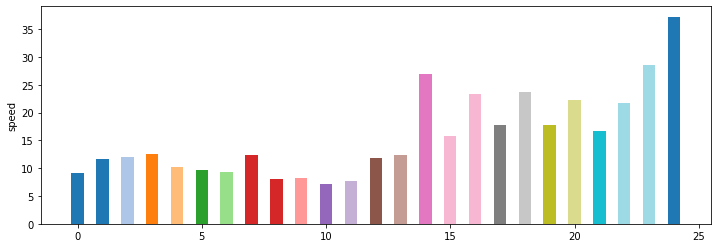

In [19]:
mean_tempos = grouped.mean()["SPEED"]
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(labels,mean_tempos,0.5,color=colors_list)
ax.set_ylabel("speed")

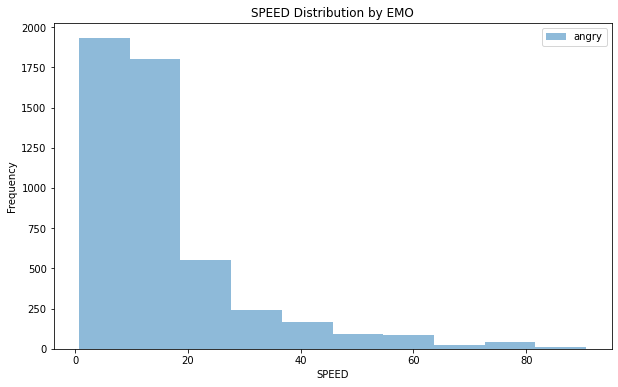

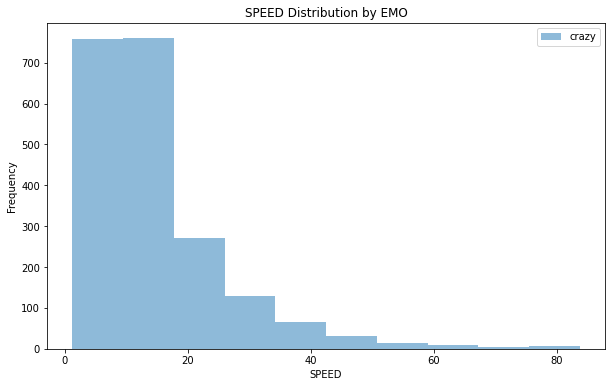

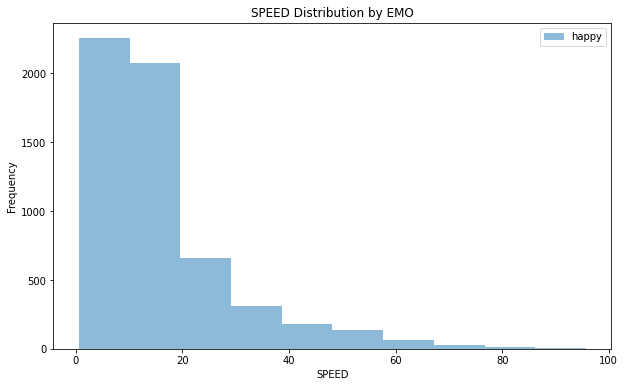

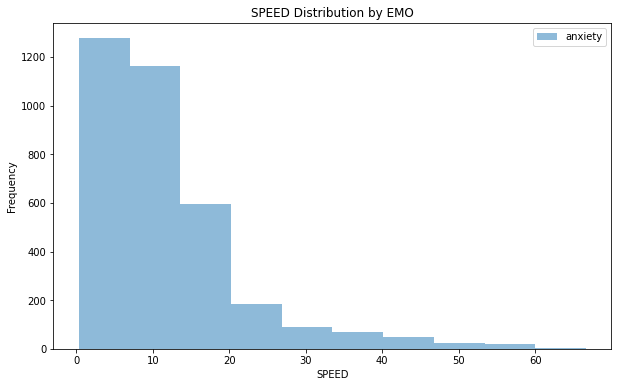

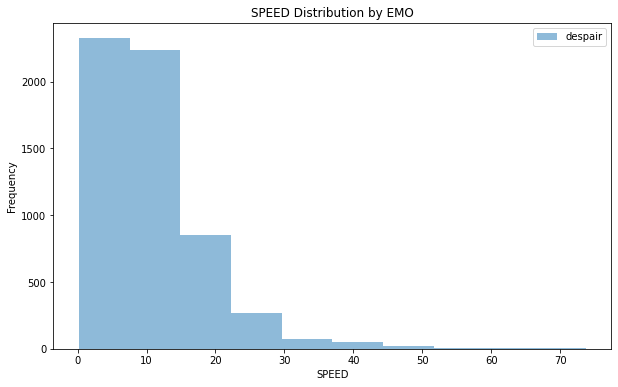

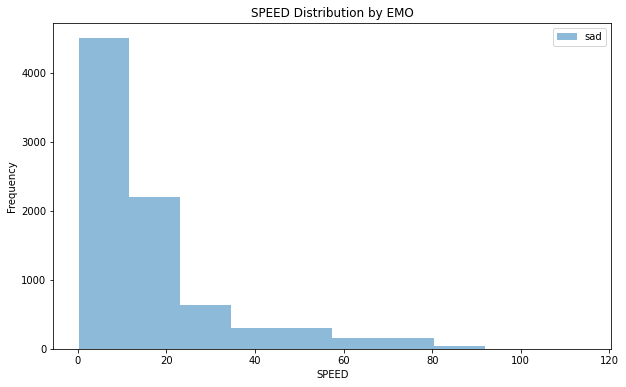

In [54]:
#Velocity distribution of all bones for each emotion (frequency of occurrence of a certain velocity), with this graph you can see that emotions have some effect on the amount of activity of a person
import matplotlib.pyplot as plt
import pandas as pd

for emo in df_phase_speed['EMO'].unique():
    # Create histograms for each EMO category()
    plt.figure(figsize=(10, 6))

    plt.hist(df_phase_speed[df_phase_speed['EMO'] == emo]['SPEED'], alpha=0.5, label=emo)

    plt.xlabel('SPEED')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('SPEED Distribution by EMO')
    plt.show()


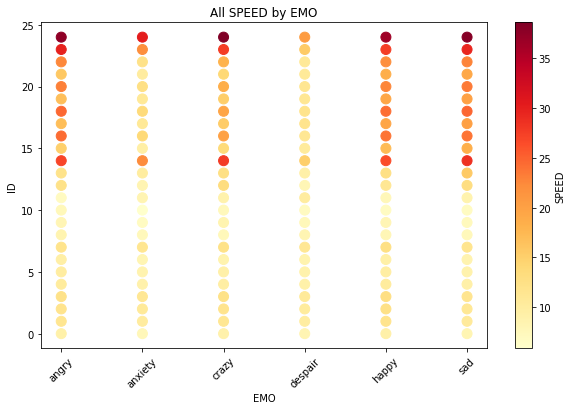

In [52]:
#Which bones are most frequently affected by emotions, and a particular bone is most active in a particular emotion (paired with the ranking notes above )
plt.figure(figsize=(10, 6))
plt.scatter(df_avg_speed['EMO'], df_avg_speed['ID'], s=100, c=df_avg_speed['SPEED'], cmap='YlOrRd')
plt.xlabel('EMO')
plt.ylabel('ID')
plt.title('All SPEED by EMO')
plt.xticks(rotation=45)
plt.colorbar(label='SPEED')
plt.show()

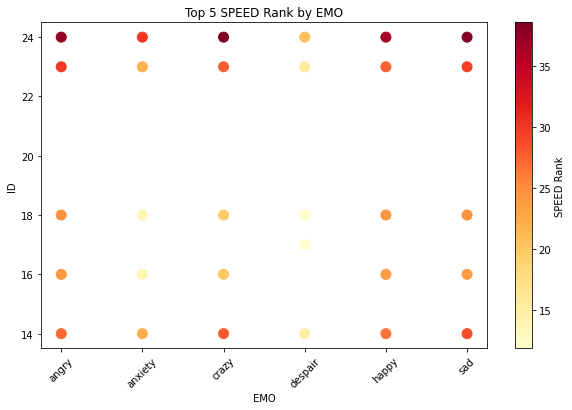

In [51]:
# The five fastest moving points can be seen as the five fastest moving points are roughly the same, but there is a significant difference in the speed of these five points
plt.figure(figsize=(10, 6))
plt.scatter(top_5_ids['EMO'], top_5_ids['ID'], s=100, c=top_5_ids['SPEED'], cmap='YlOrRd')
plt.xlabel('EMO')
plt.ylabel('ID')
plt.title('Top 5 SPEED Rank by EMO')
plt.xticks(rotation=45)
plt.colorbar(label='SPEED')
plt.show()